In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
path_to_kl_div_sum = "../ShallowAE/Sparse/KL_div_sum/"
data = bastien_utils.load_data(FILE_PATH, train=True, test=True, subsetTest=True)
x_train, y_train, x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [3]:
pd.read_csv("../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01results")

Unnamed: 0  sparsity_objective  sparsity_weight  test_error  test_kl_loss  \
0            0                0.01             0.01    0.030503      0.005356   
1            1                0.05             0.01    0.017590      0.001091   
2            2                0.10             0.01    0.013367      0.000863   
3            3                0.20             0.01    0.010380      0.000687   
4            4                0.01             0.10    0.044085      0.004102   
5            5                0.05             0.10    0.019681      0.003821   
6            6                0.10             0.10    0.014663      0.004441   
7            7                0.20             0.10    0.011739      0.008623   
8            8                0.01             0.50    0.053131      0.005185   
9            9                0.05             0.50    0.025286      0.018647   
10          10                0.10             0.50    0.023344      0.198847   
11          11                0.20             0.50    0.015574      0.043674   
12          12                0.01             1.00    0.057029      0.008332   
13          13                0.05             1.00    0.030795      0.026037   
14          14                0.10             1.00    0.026535      0.119817   
15          15                0.20             1.00    0.019616      0.278577   
16          16                0.01            10.00    0.070231      0.050469   
17          17                0.05            10.00    0.056482      0.568396   
18          18                0.10            10.00    0.046945      1.202292   
19          19                0.20            10.00    0.034061      0.779245   

    test_max_approx_error_toOriginal_dilatation  \
0                                      0.075174   
1                                      0.160881   
2                                      0.510807   
3                                      2.167435   
4                                      0.064997   
5                                      0.183375   
6                                      0.722625   
7                                      2.856205   
8                                      0.075383   
9                                      0.208720   
10                                     1.086788   
11                                     3.509812   
12                                     0.080711   
13                                     0.197189   
14                                     0.749542   
15                                     4.477404   
16                                     0.095654   
17                                     0.175782   
18                                     0.741724   
19                                     3.548004   

    test_max_approx_error_toRec_dilatation  test_sparsity  training_error  \
0                                 0.051366       0.736750        0.030408   
1                                 0.168944       0.568108        0.017450   
2                                 0.541470       0.418449        0.013270   
3                                 2.223941       0.231117        0.010306   
4                                 0.013952       0.590963        0.044179   
5                                 0.191730       0.410924        0.019557   
6                                 0.759501       0.270147        0.014582   
7                                 2.896347       0.160568        0.011658   
8                                 0.010889       0.351383        0.053311   
9                                 0.225577       0.250164        0.025203   
10                                1.240085       0.164182        0.023239   
11                                3.616462       0.162262        0.015483   
12                                0.011116       0.217223        0.057214   
13                                0.197011       0.210222        0.030750   
14                                0.764501       0.174227        0.026454  

In [4]:
sparsity_objectives = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_sparsityObjectives_test_sparsity_hyperparameters.npy')
sparsity_weights = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_sparsityWeights_test_sparsity_hyperparameters.npy')
test_mse = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_errors_test_sparsity_hyperparameters.npy')
train_mse = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_errors_test_sparsity_hyperparameters.npy')
test_kl_loss = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_kl_loss_test_sparsity_hyperparameters.npy')
train_kl_loss = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_kl_loss_test_sparsity_hyperparameters.npy')
test_max_approx_to_Original = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_max_approx_error_toOriginal_dilationtest_sparsity_hyperparameters.npy')
train_max_approx_to_Original = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_max_approx_error_toOriginal_dilatationtest_sparsity_hyperparameters.npy')
test_max_approx_to_Rec = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_max_approx_error_toRec_dilationtest_sparsity_hyperparameters.npy')
train_max_approx_to_Rec = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_max_approx_error_toRec_dilatationtest_sparsity_hyperparameters.npy')
test_sparsity = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_test_sparsity_test_sparsity_hyperparameters.npy')
train_sparsity = np.load('../ShallowAE/Sparse/KL_div_sum/TestOutputs/18_08_01_training_sparsity_test_sparsity_hyperparameters.npy')

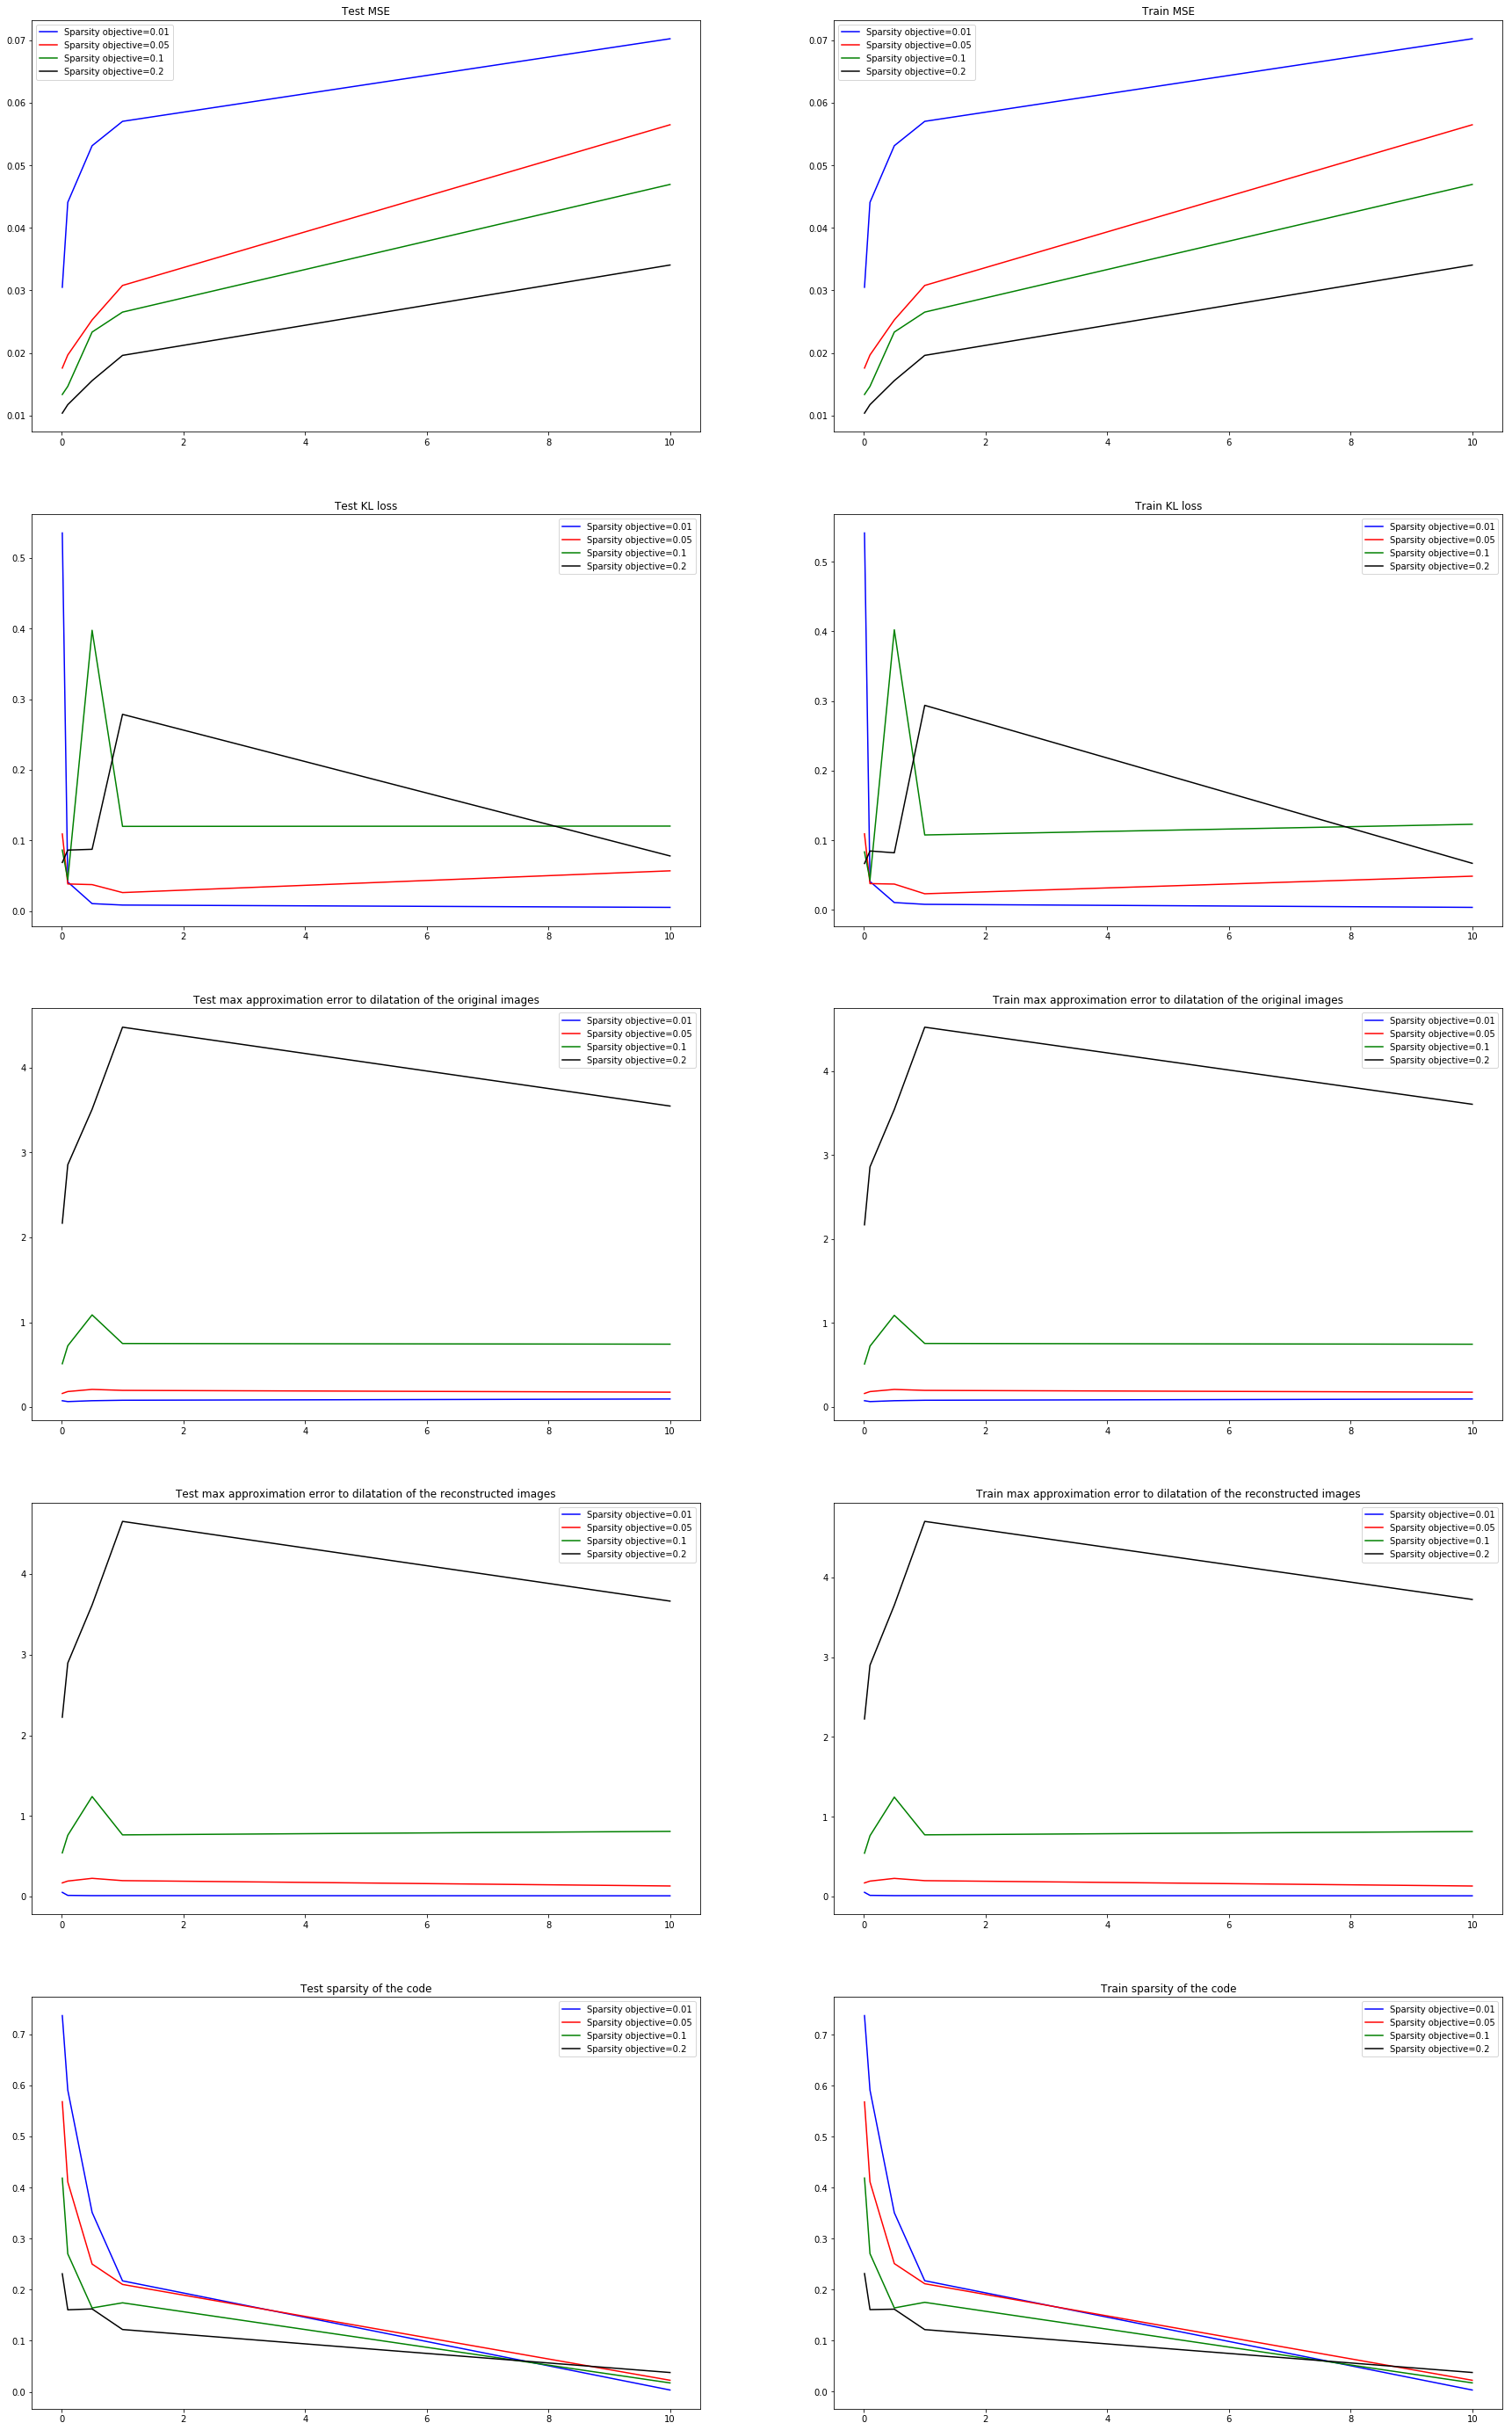

In [5]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

Note that when the weight is too low, a lower sparsity objective does not lead to a higher value of the sparsity measure.

# 1. Sparsity Objective: 0.01

In [6]:
sparsity_objectives[0]

0.01

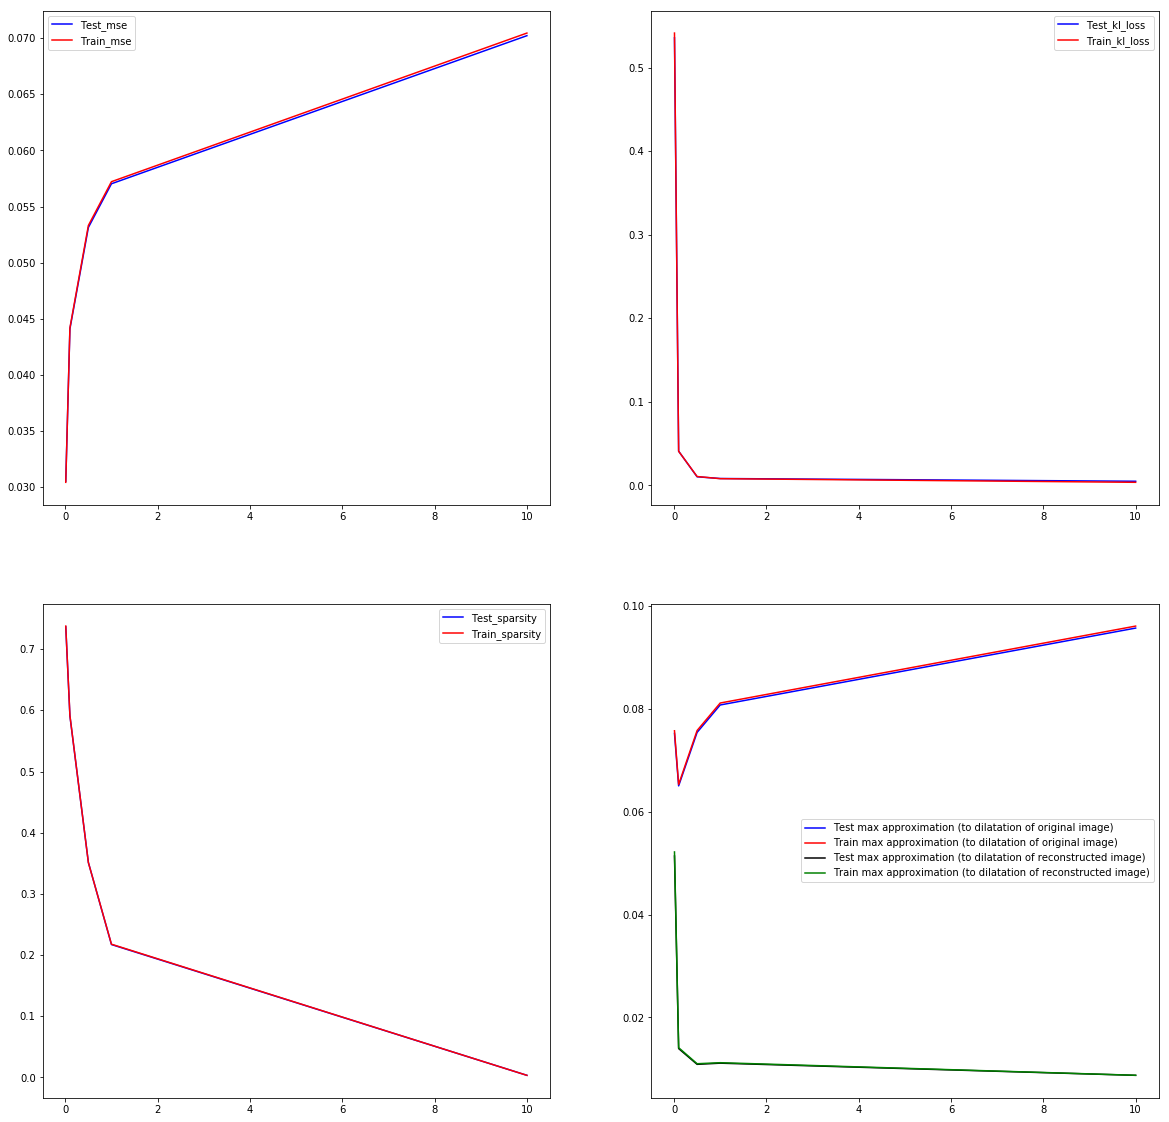

In [7]:
plt.figure(figsize=(20,20))

ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,0], 'r')
ax.legend(['Test_mse', 'Train_mse'])

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'r')
ax.legend(['Test_kl_loss', 'Train_kl_loss'])

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,0], 'r')
ax.legend(['Test_sparsity', 'Train_sparsity'])

ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'k')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'g')
ax.legend(['Test max approximation (to dilatation of original image)', 
           'Train max approximation (to dilatation of original image)',
           'Test max approximation (to dilatation of reconstructed image)',
           'Train max approximation (to dilatation of reconstructed image)'])

plt.show()

## 1.1 Sparsity weight = 0.01

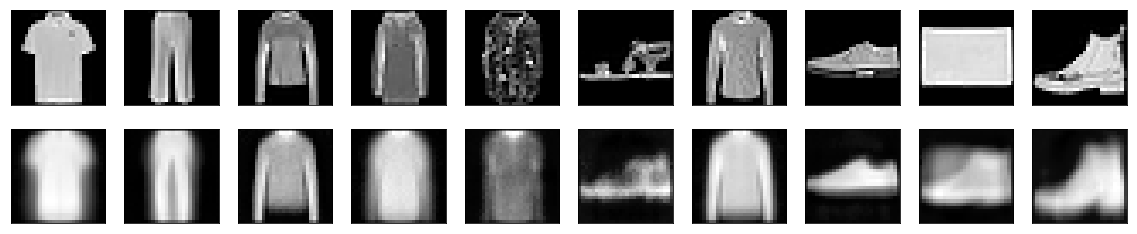

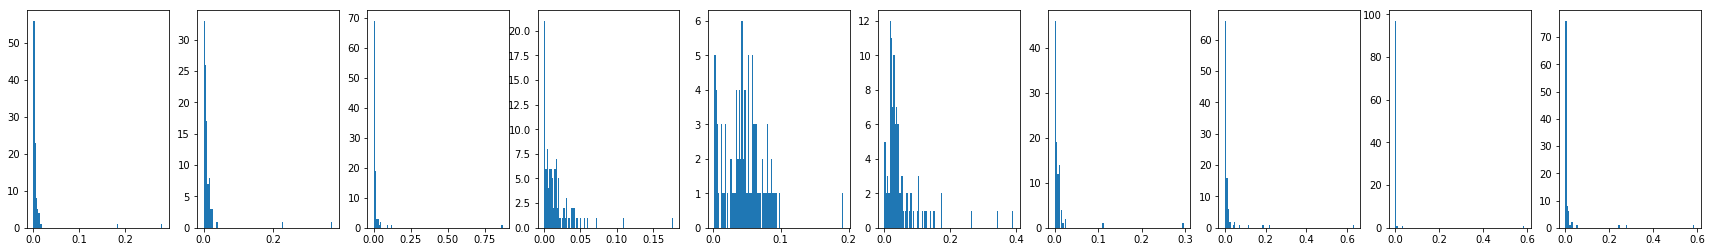

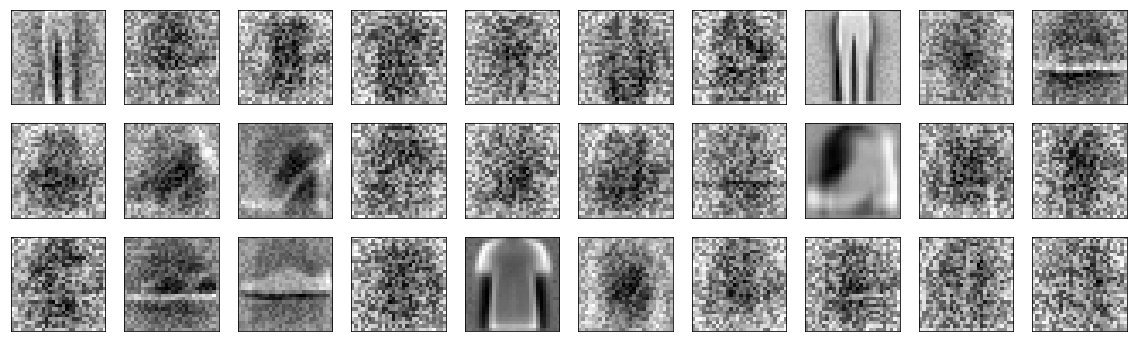

In [8]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.01_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

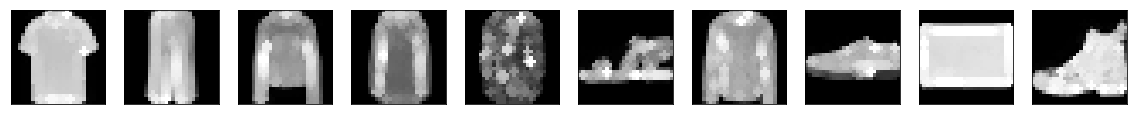

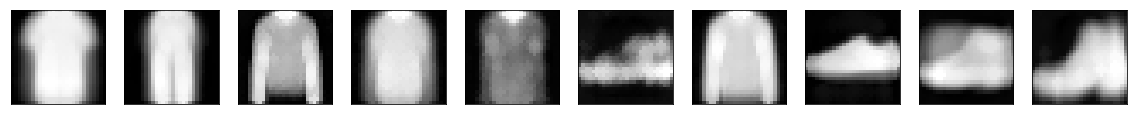

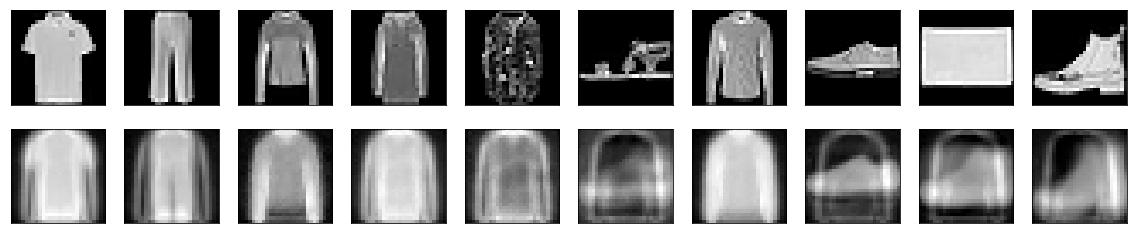

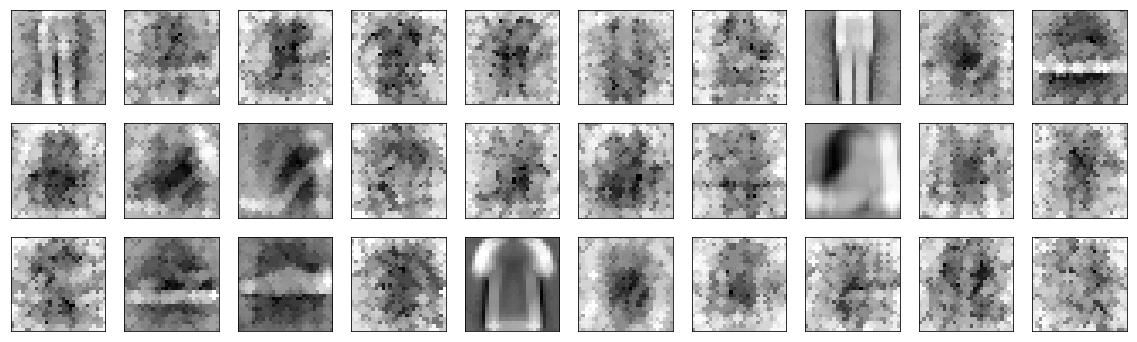

In [9]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity weight = 0.1

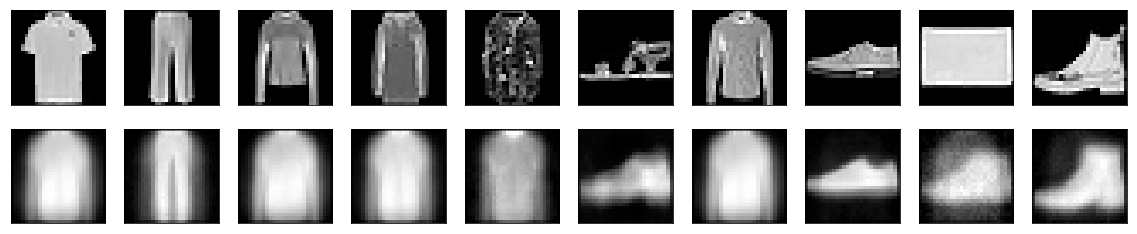

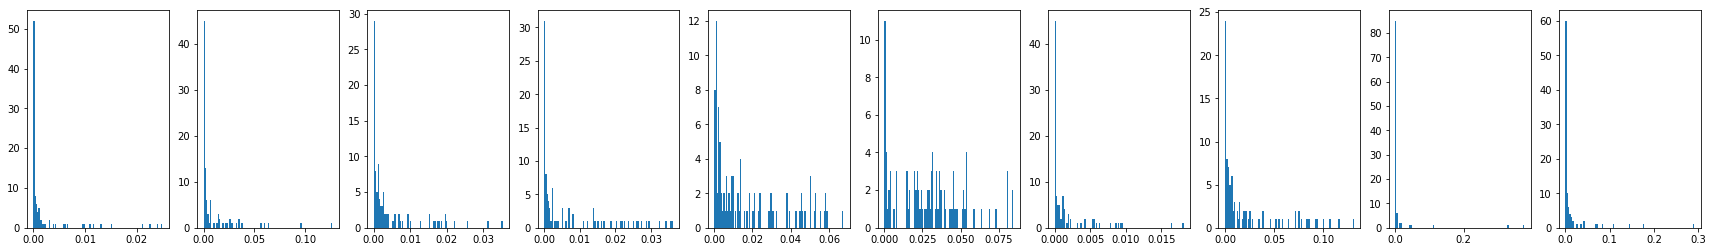

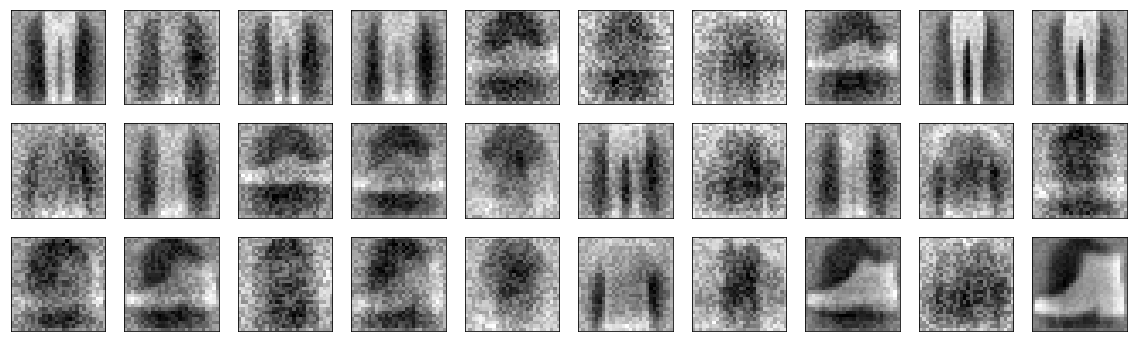

In [10]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.1_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

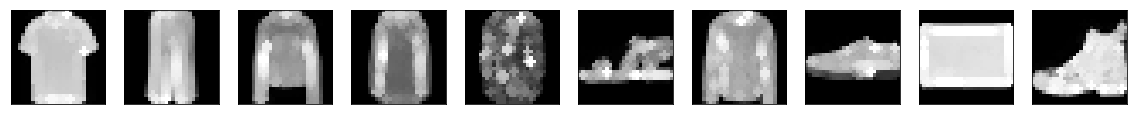

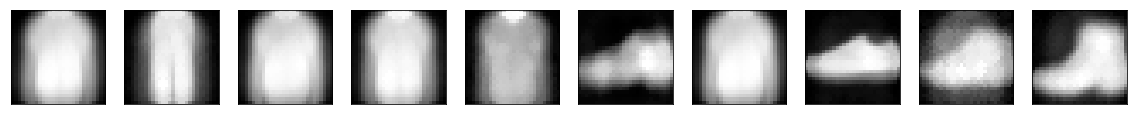

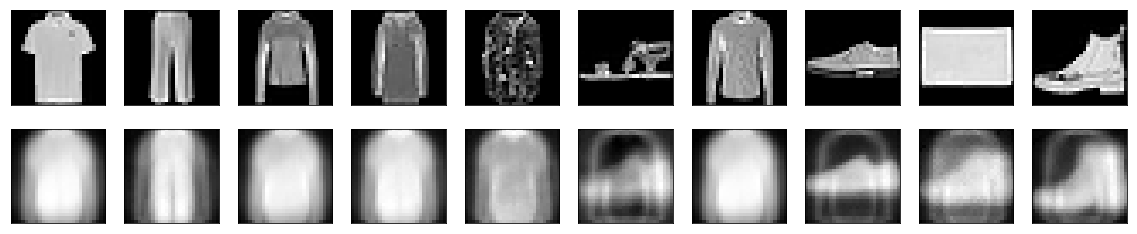

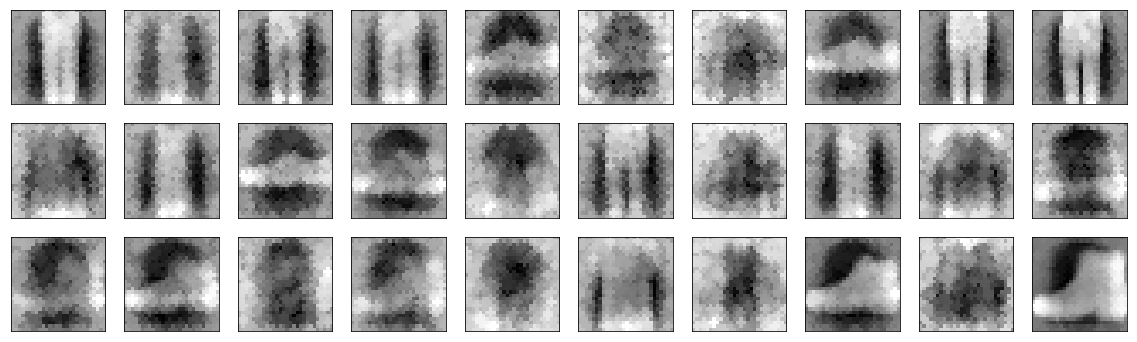

In [11]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity weight = 0.5

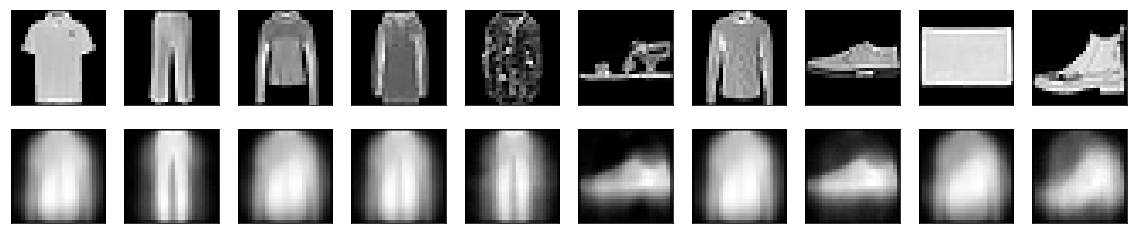

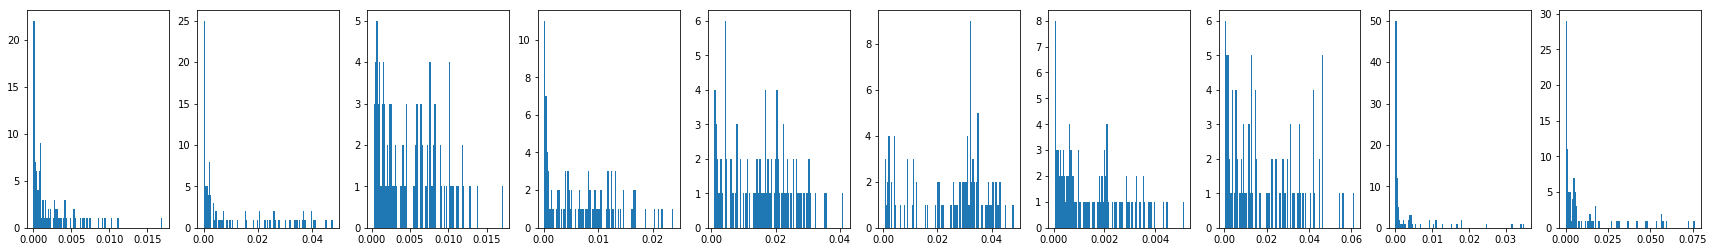

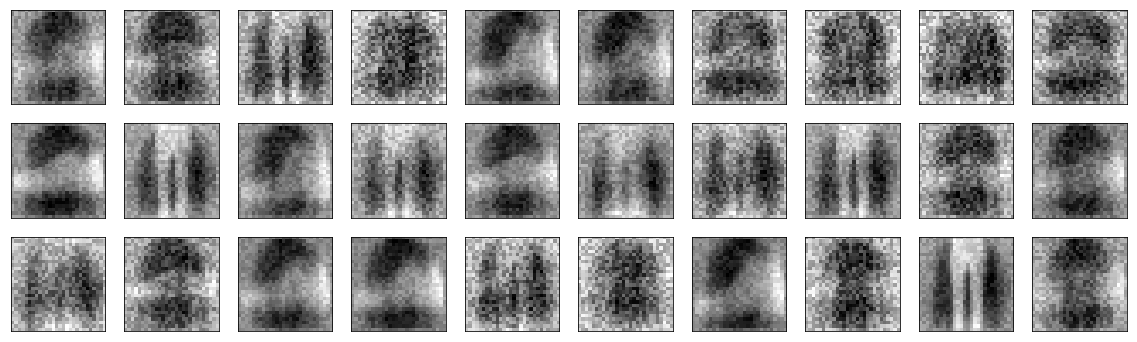

In [12]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.5_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

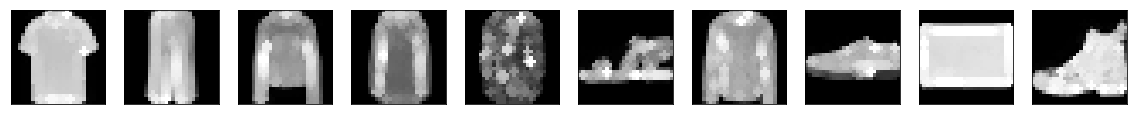

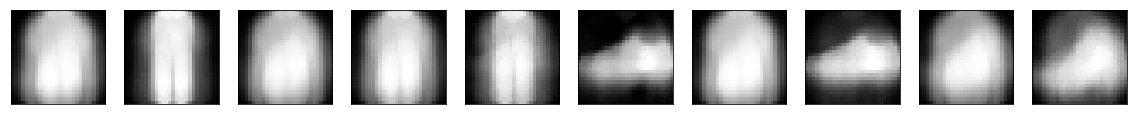

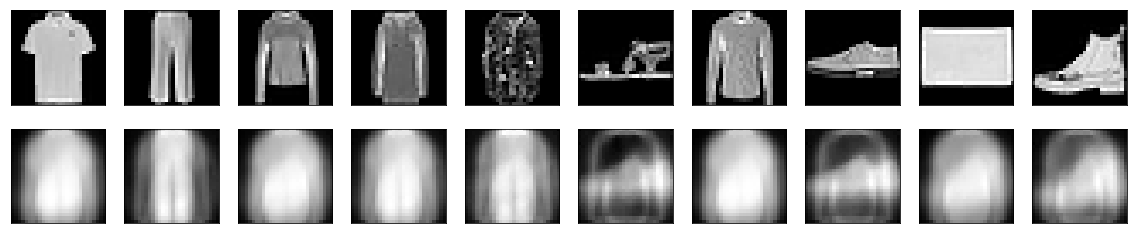

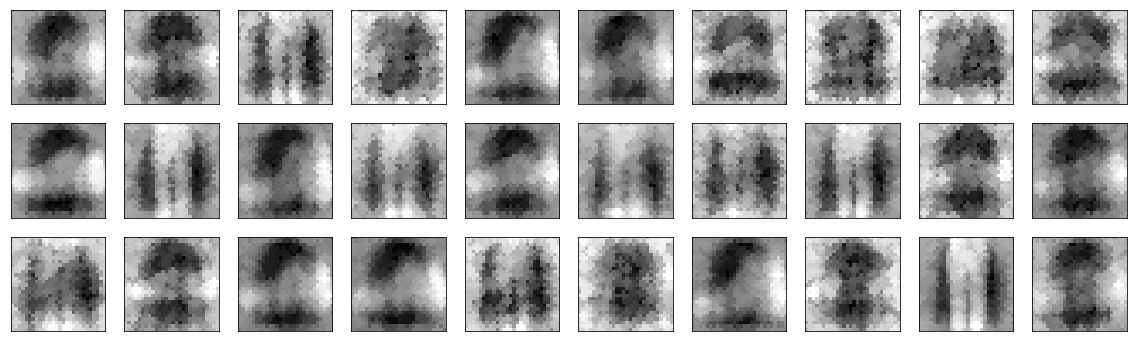

In [13]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.4 Sparsity weight = 1

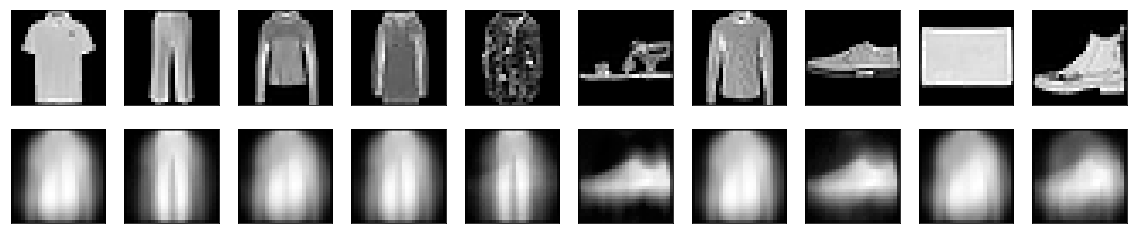

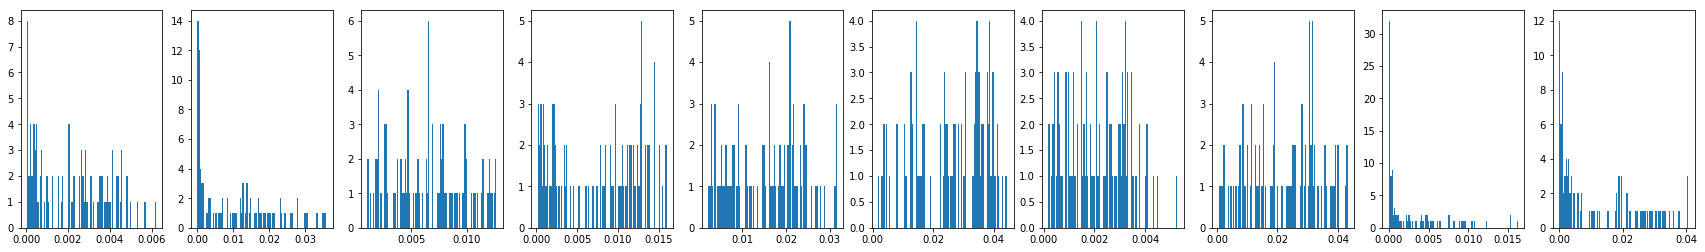

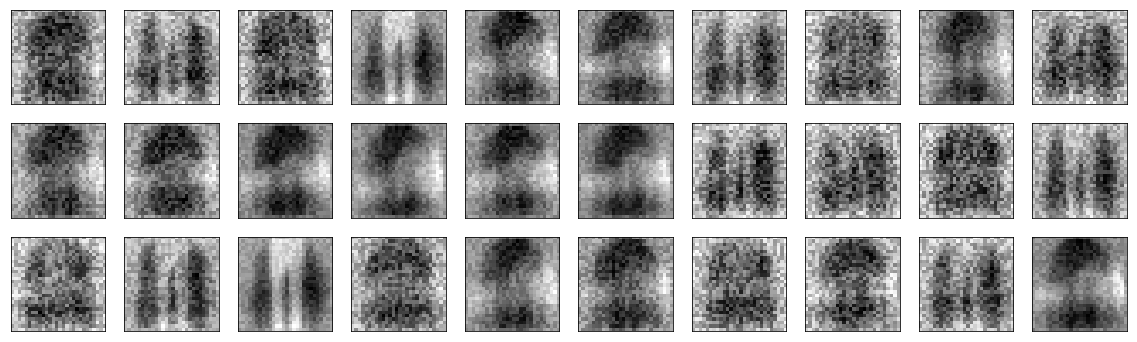

In [14]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_1_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

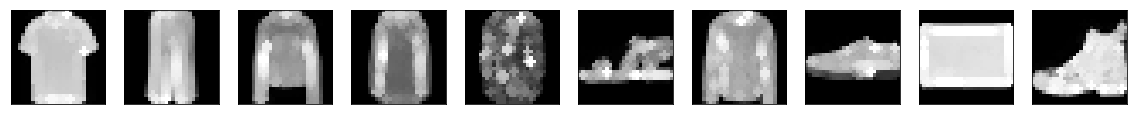

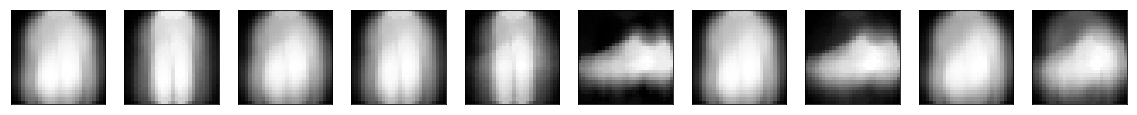

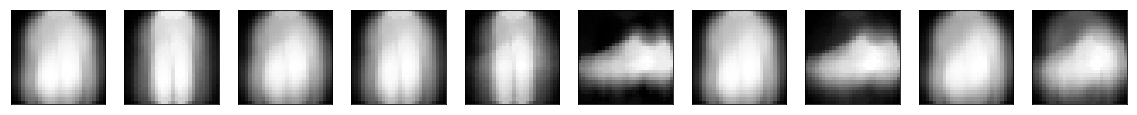

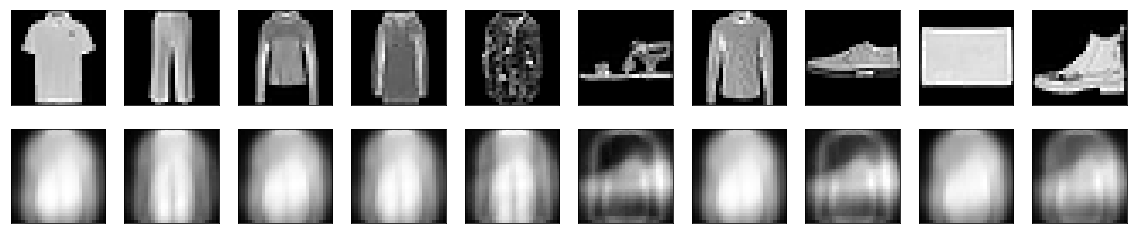

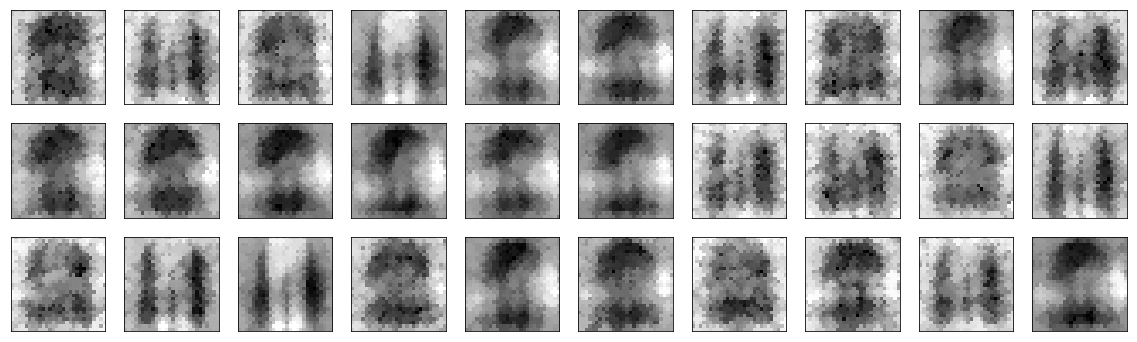

In [15]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity weight = 10

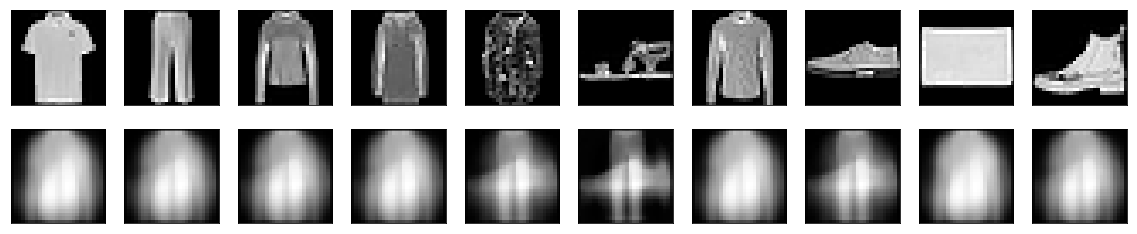

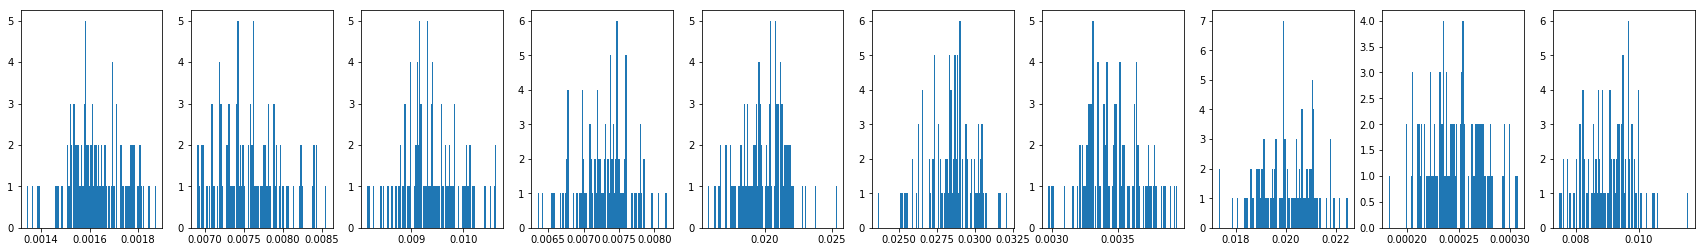

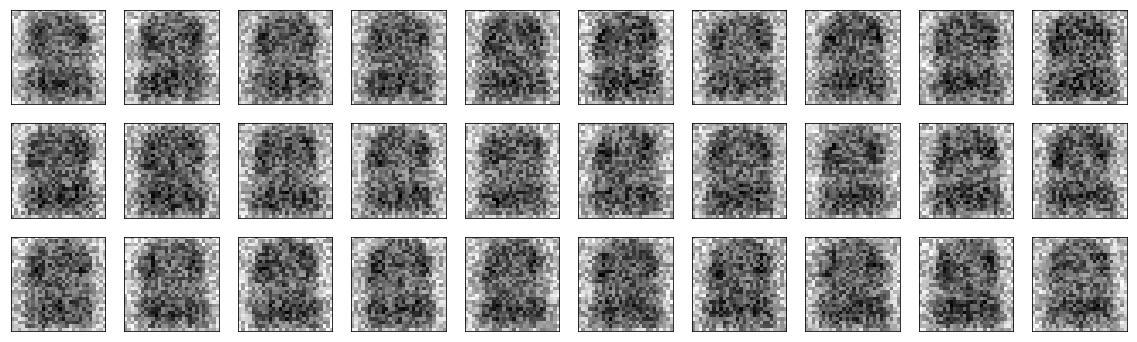

In [16]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_10_0.01.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

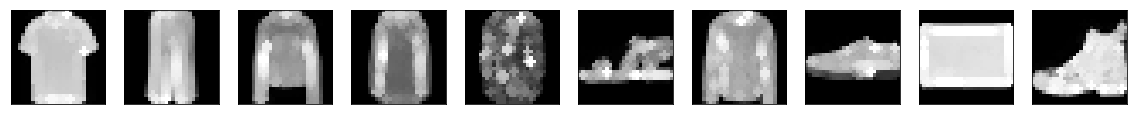

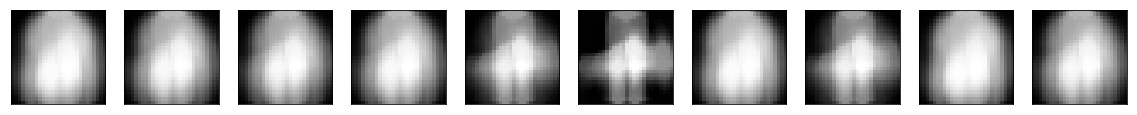

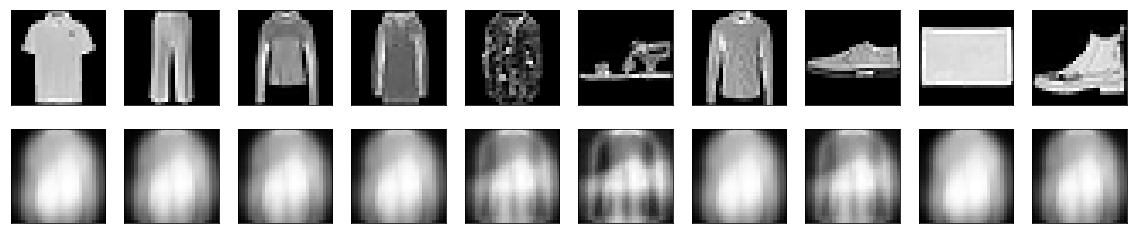

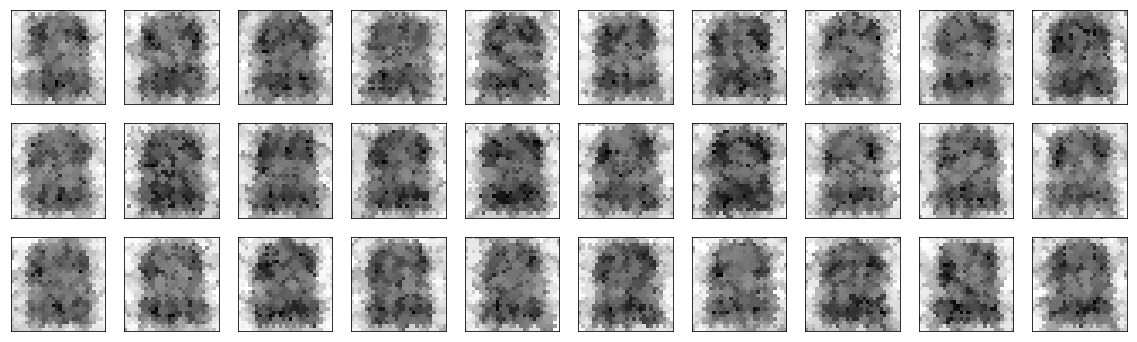

In [17]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_objective = 0.05

In [18]:
sparsity_objectives[1]

0.05

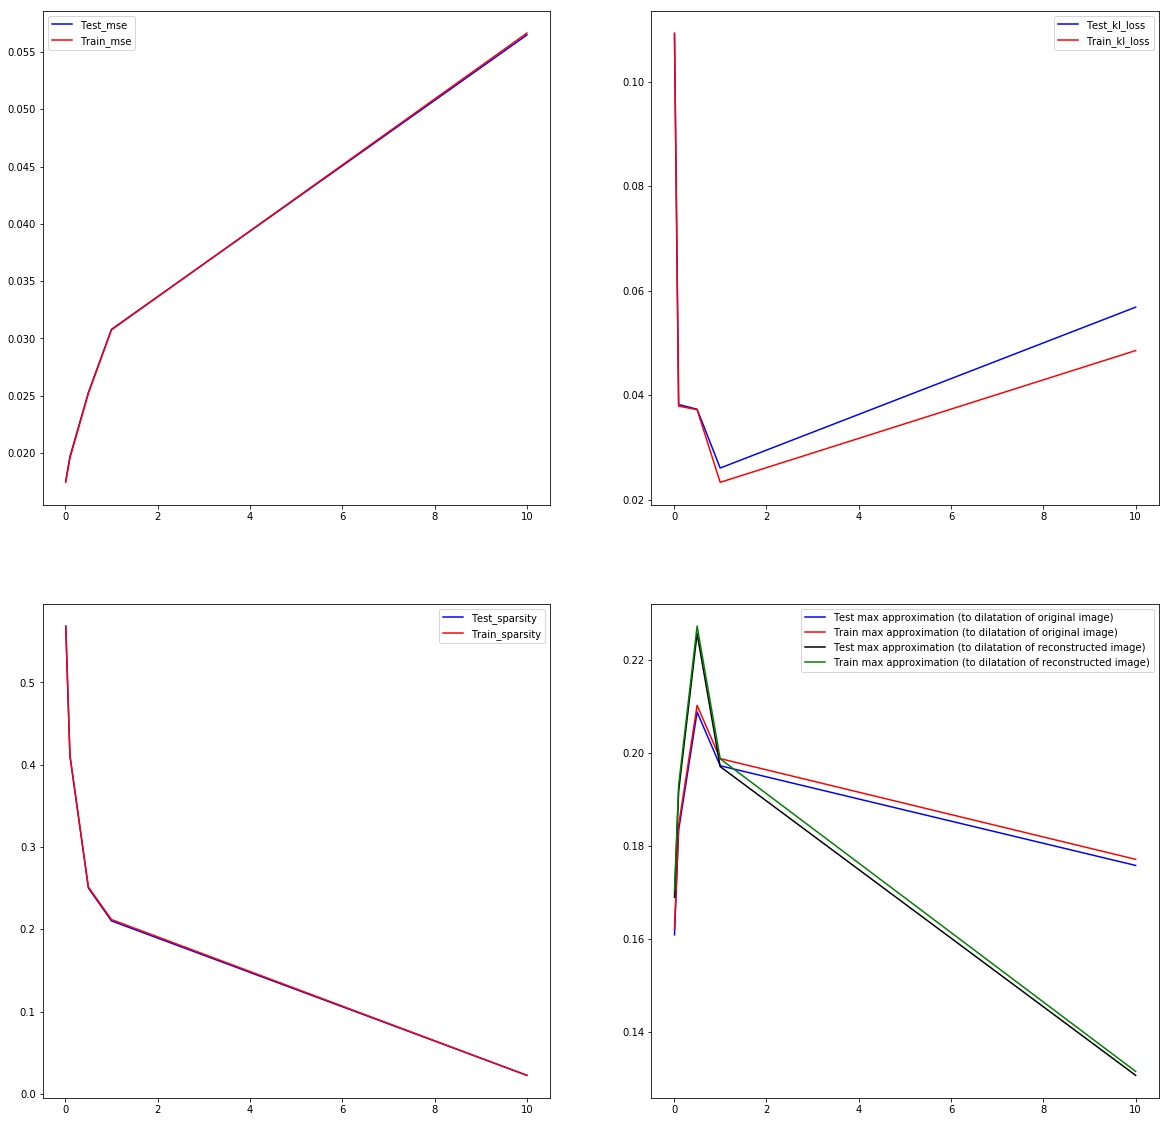

In [19]:
plt.figure(figsize=(20,20))

ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,1], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.legend(['Test_mse', 'Train_mse'])

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.legend(['Test_kl_loss', 'Train_kl_loss'])

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_sparsity[:,1], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.legend(['Test_sparsity', 'Train_sparsity'])

ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'k')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'g')
ax.legend(['Test max approximation (to dilatation of original image)', 
           'Train max approximation (to dilatation of original image)',
           'Test max approximation (to dilatation of reconstructed image)',
           'Train max approximation (to dilatation of reconstructed image)'])

plt.show()

## 2.1 Sparsity weight = 0.01

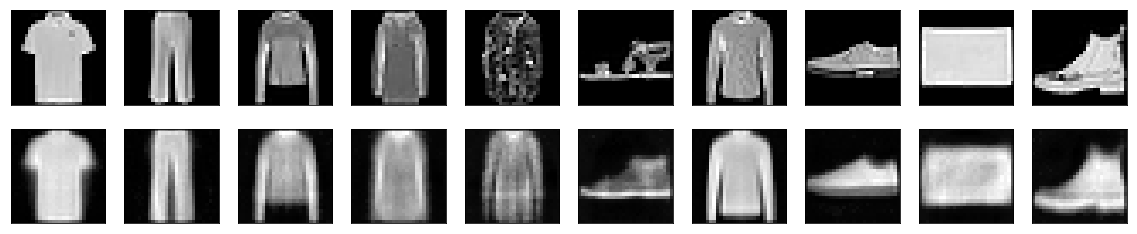

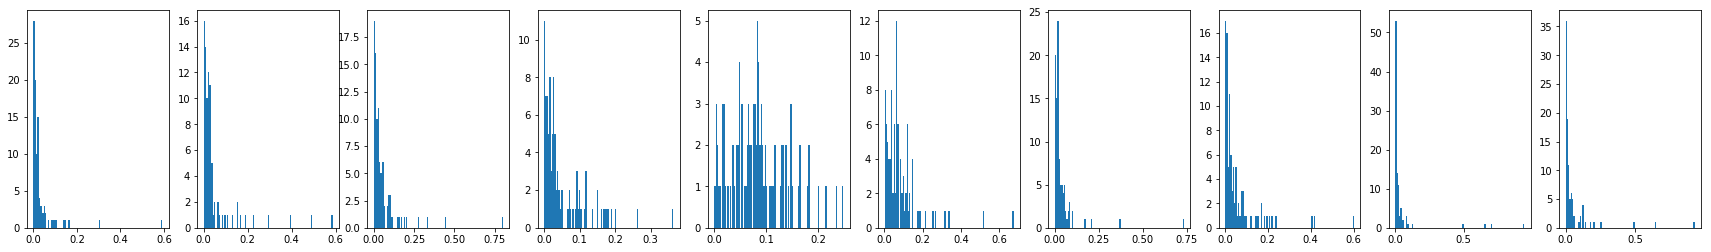

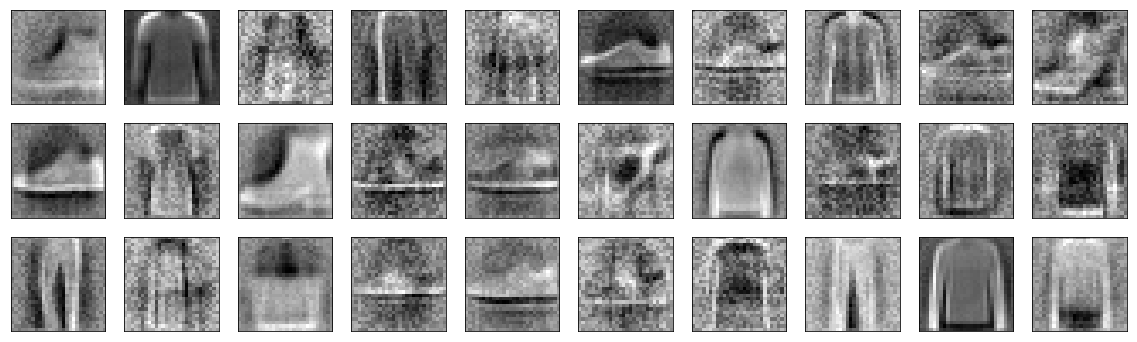

In [20]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.01_0.05.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

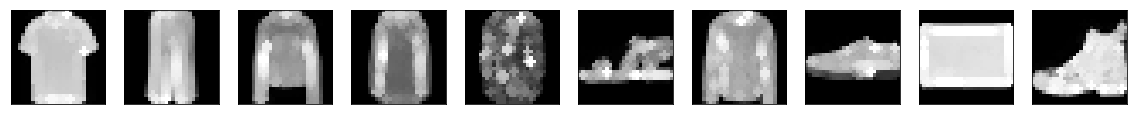

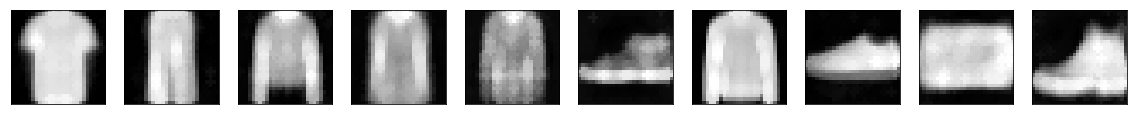

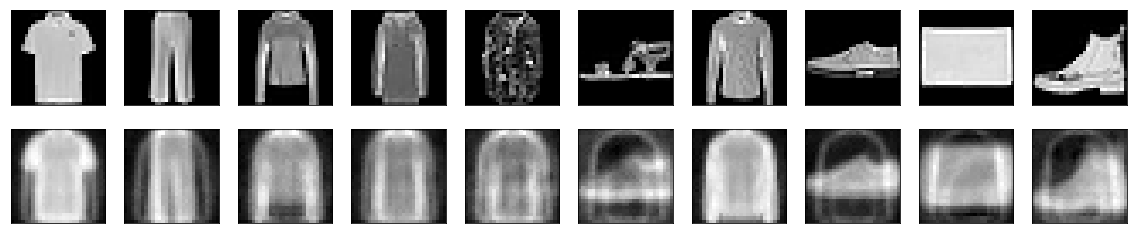

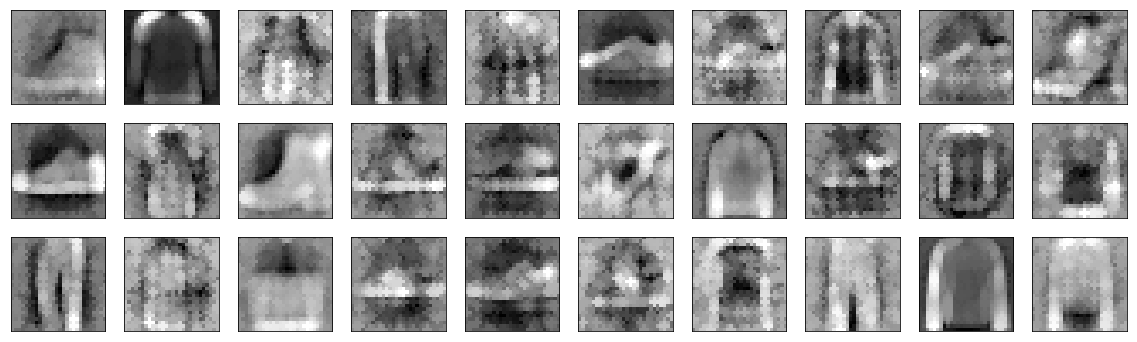

In [21]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.2 Sparsity weight = 0.1

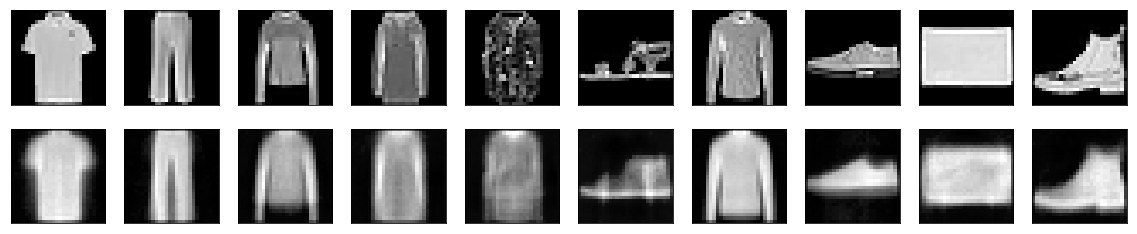

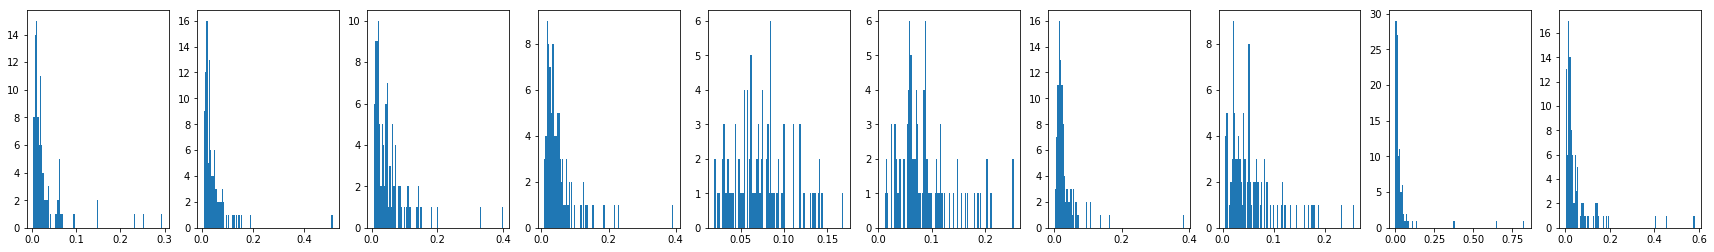

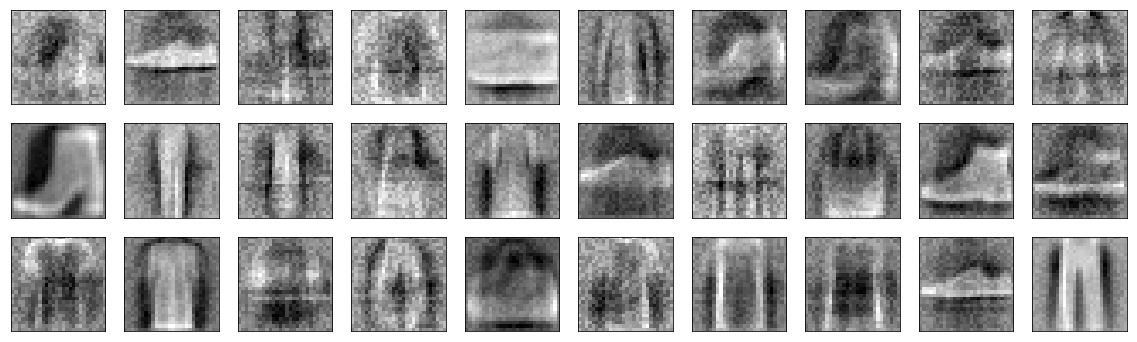

In [22]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.1_0.05.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

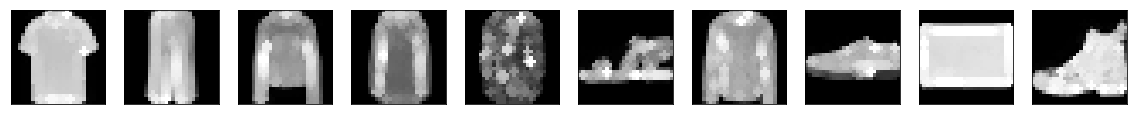

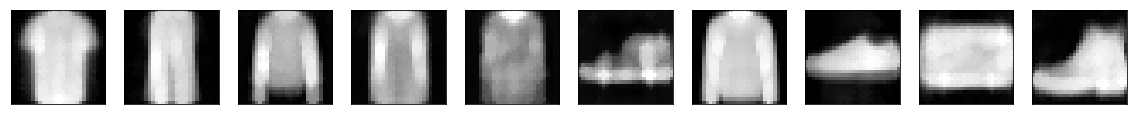

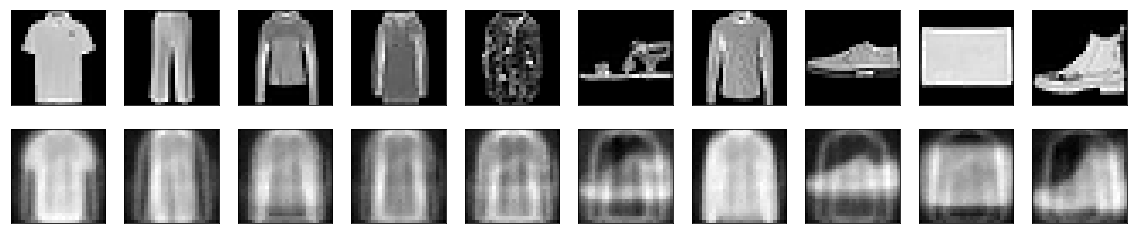

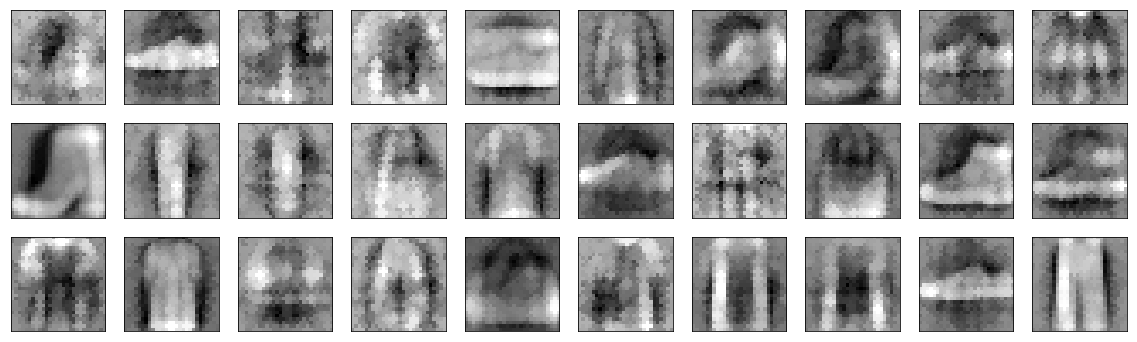

In [23]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.3 Sparsity weight = 0.5

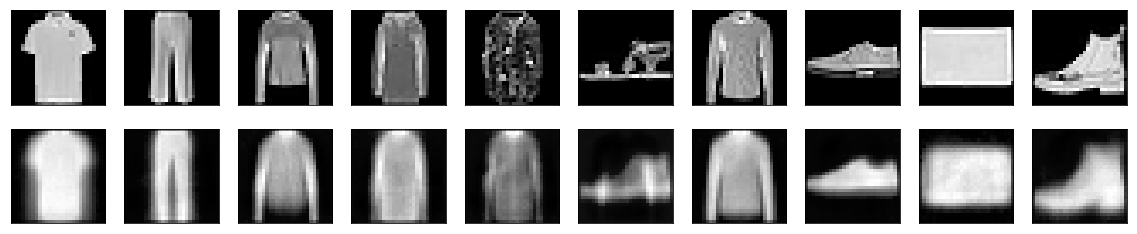

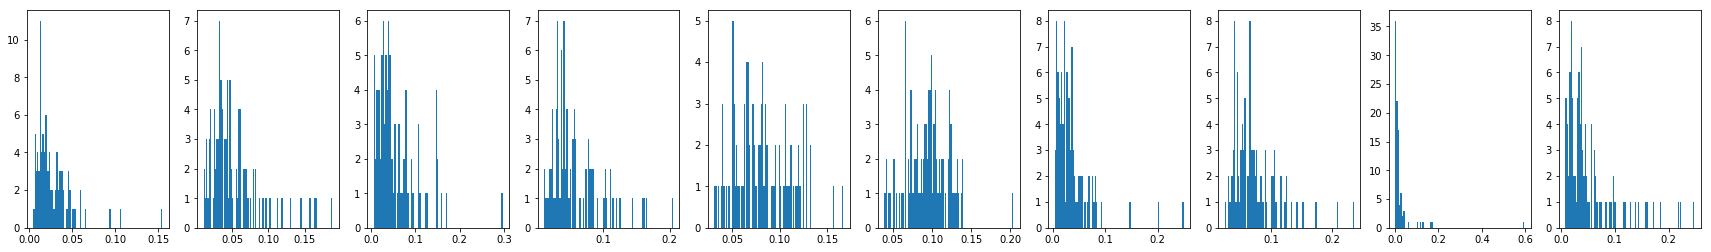

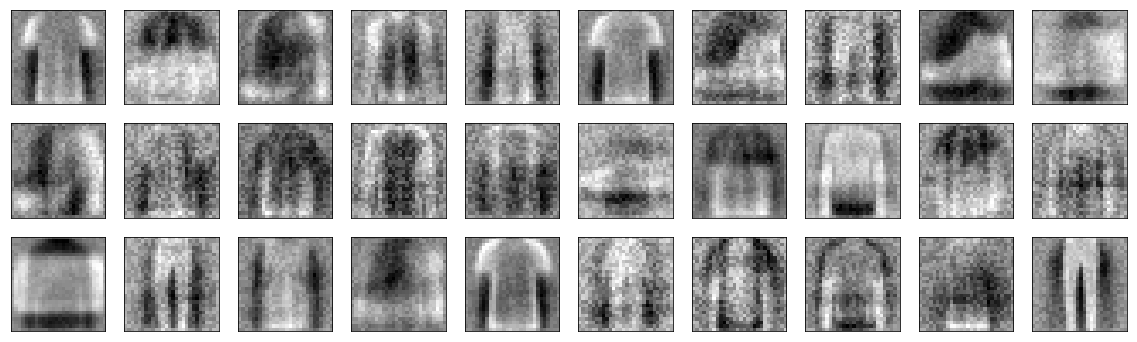

In [24]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.5_0.05.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

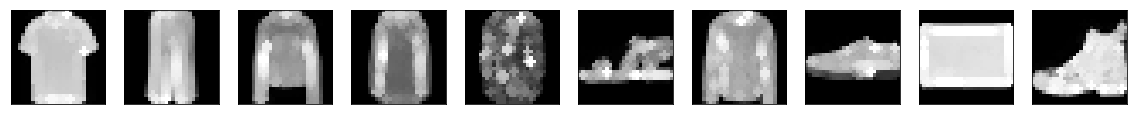

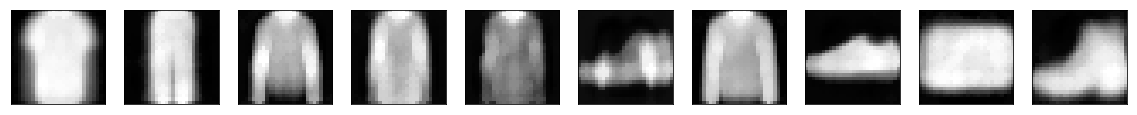

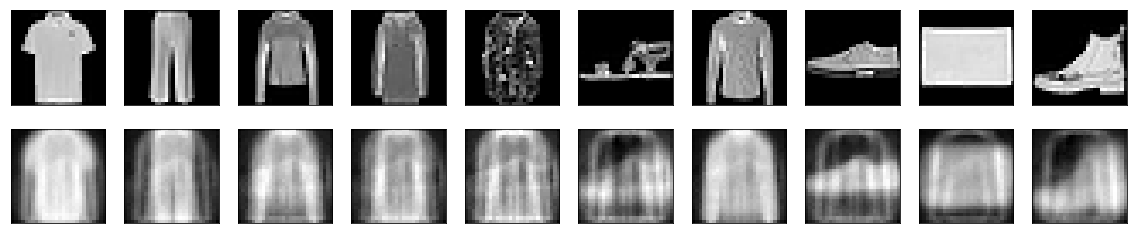

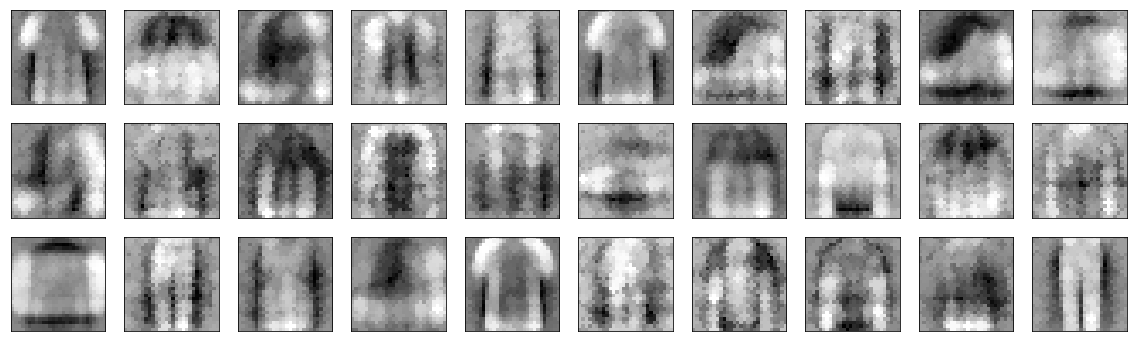

In [25]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.4 Sparsity weight = 1

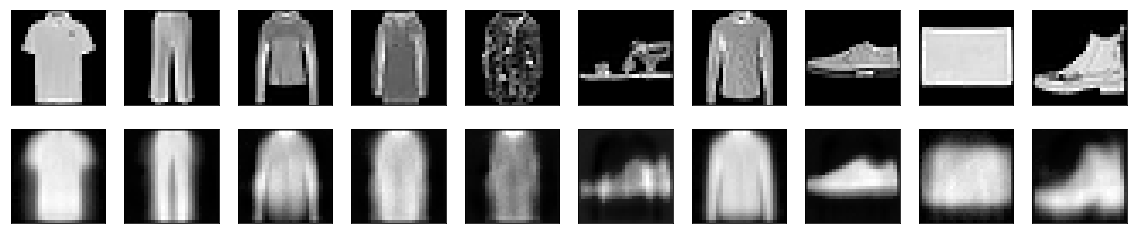

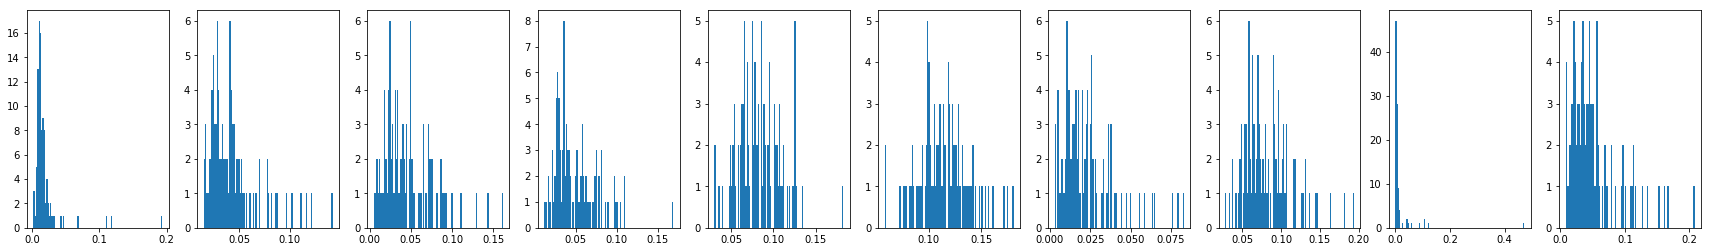

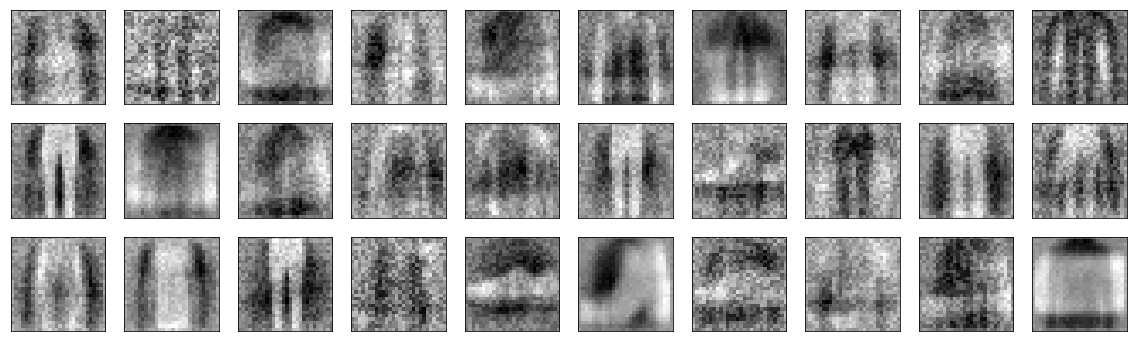

In [26]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_1_0.05.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

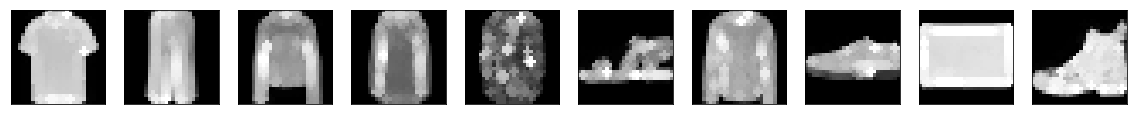

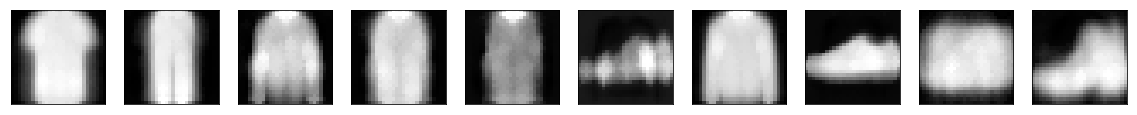

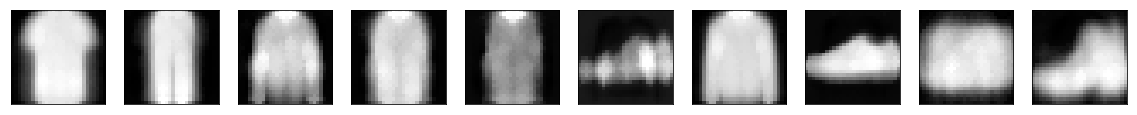

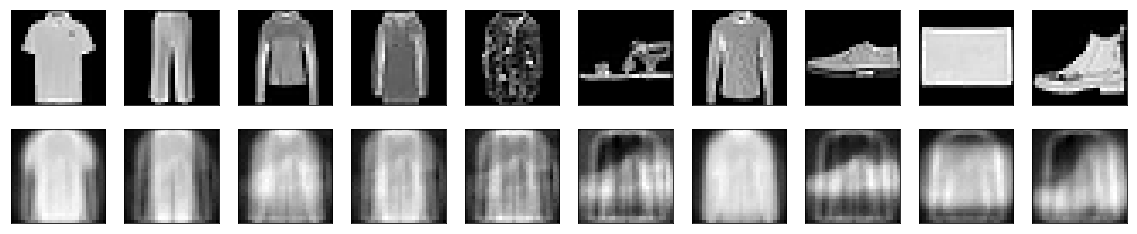

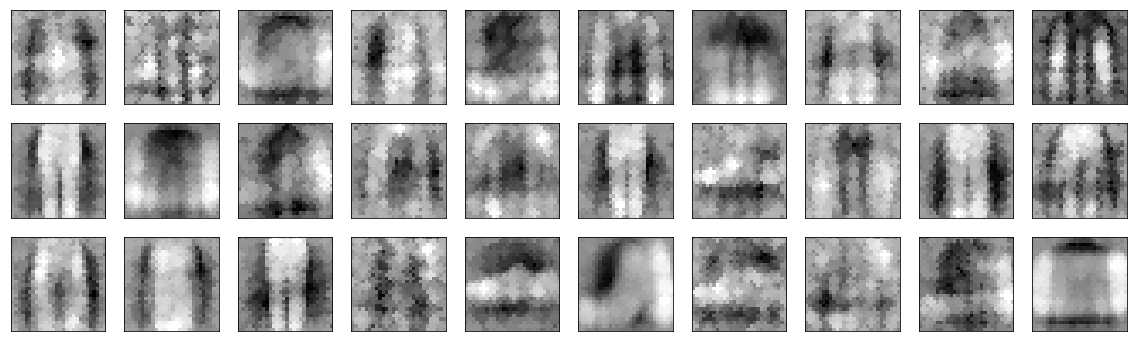

In [27]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.5 Sparsity weight = 10

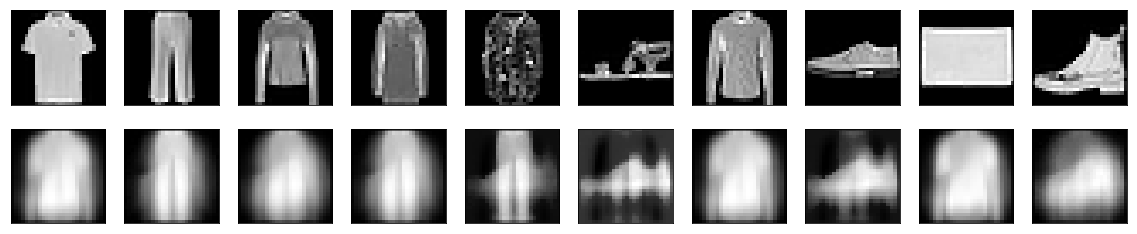

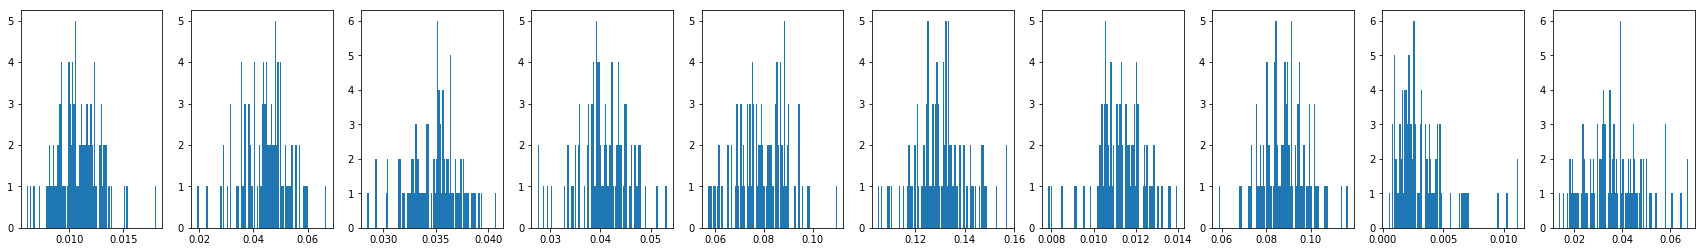

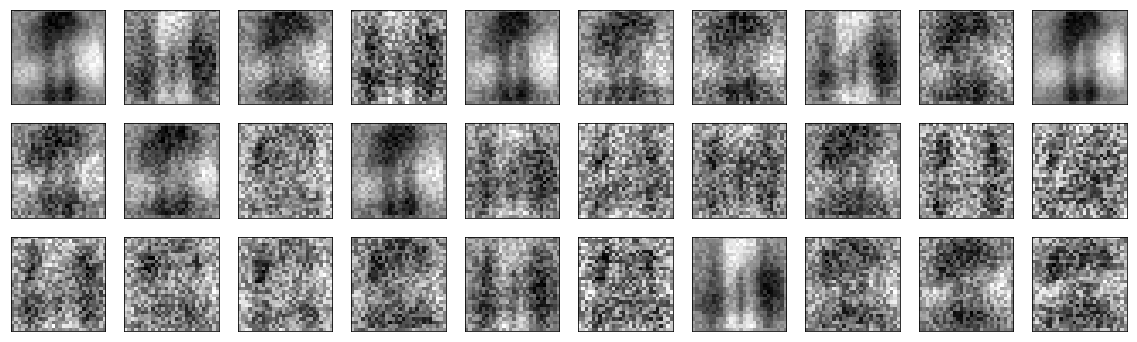

In [28]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_10_0.05.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

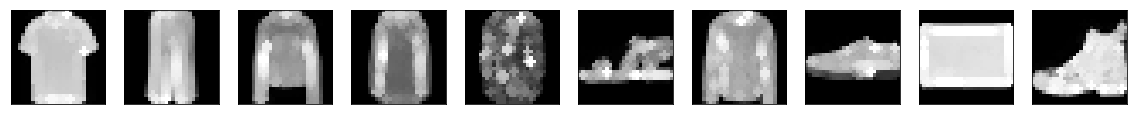

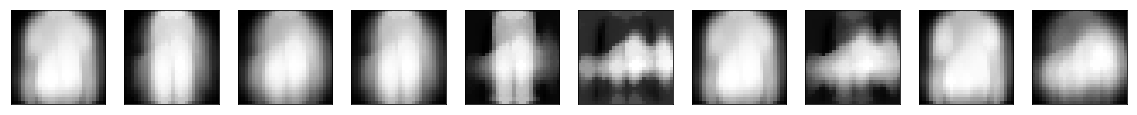

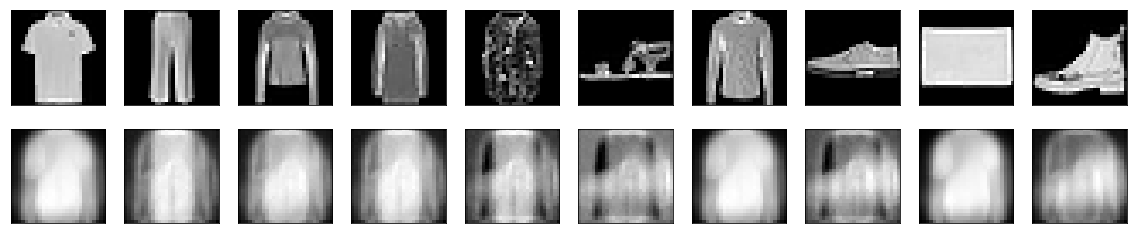

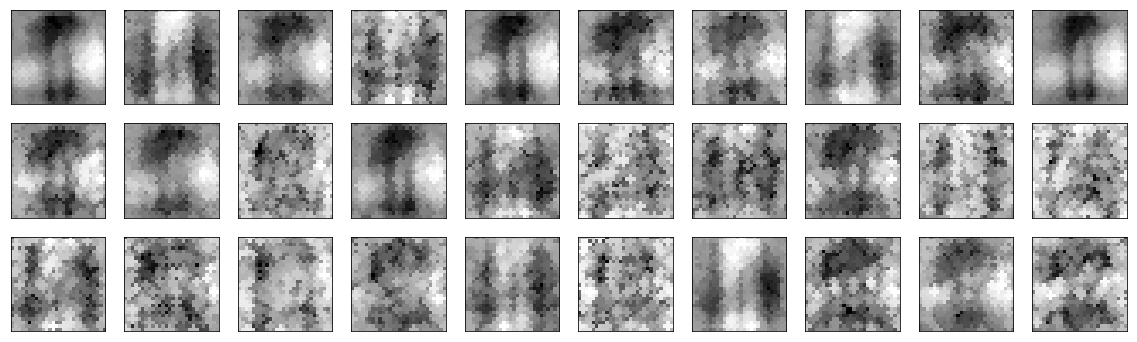

In [29]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 3. Sparsity_objective = 0.1

In [30]:
sparsity_objectives[2]

0.1

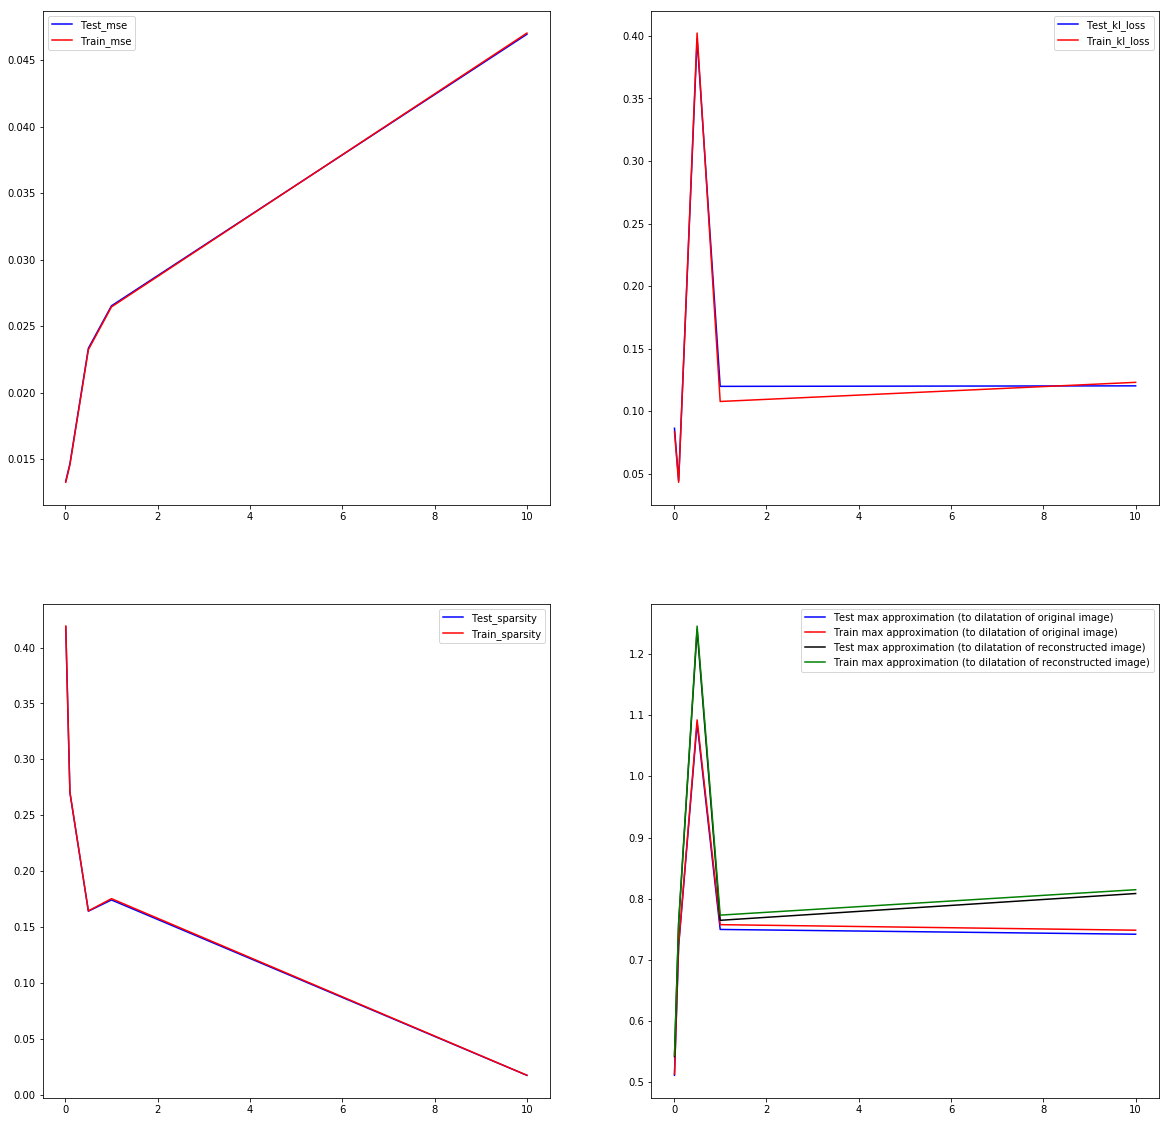

In [31]:
plt.figure(figsize=(20,20))

ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,2], 'b')
ax.plot(sparsity_weights, train_mse[:,2], 'r')
ax.legend(['Test_mse', 'Train_mse'])

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'r')
ax.legend(['Test_kl_loss', 'Train_kl_loss'])

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_sparsity[:,2], 'b')
ax.plot(sparsity_weights, train_sparsity[:,2], 'r')
ax.legend(['Test_sparsity', 'Train_sparsity'])

ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'k')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.legend(['Test max approximation (to dilatation of original image)', 
           'Train max approximation (to dilatation of original image)',
           'Test max approximation (to dilatation of reconstructed image)',
           'Train max approximation (to dilatation of reconstructed image)'])

plt.show()

## 3.1 Sparsity weight = 0.01

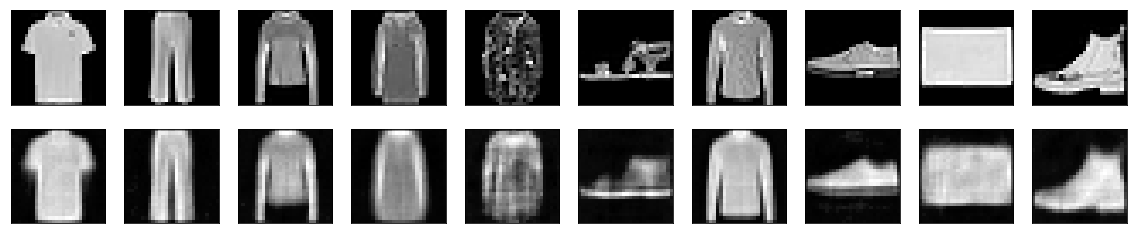

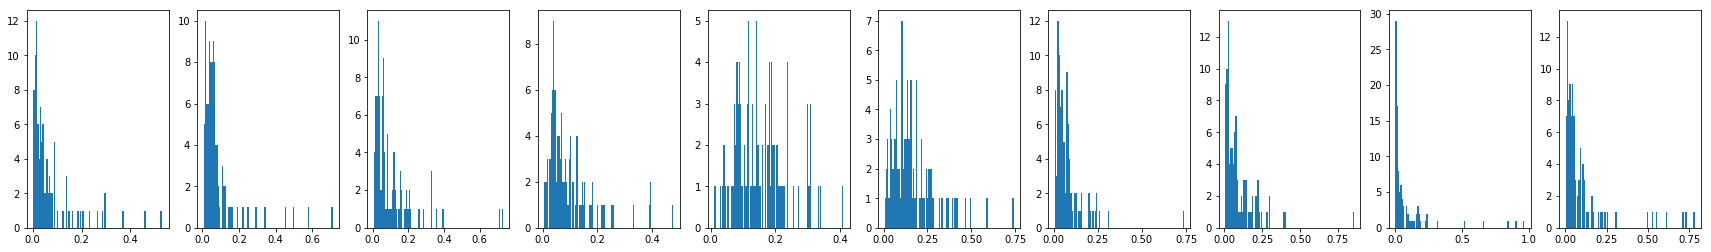

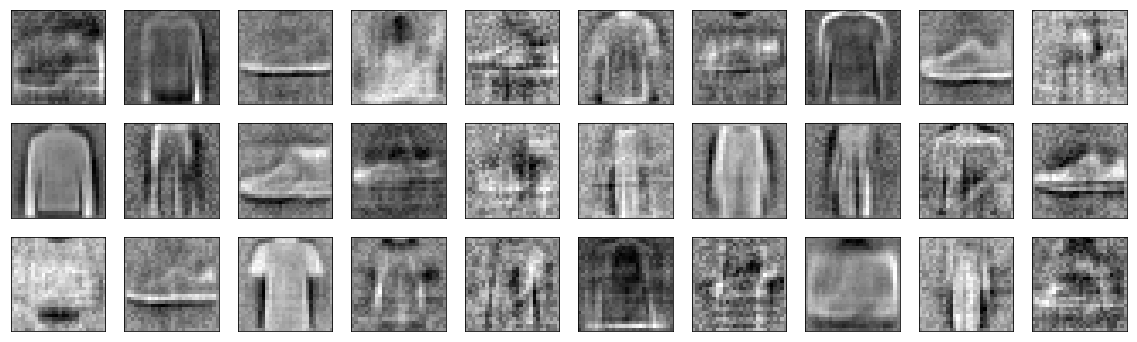

In [32]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.01_0.1.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

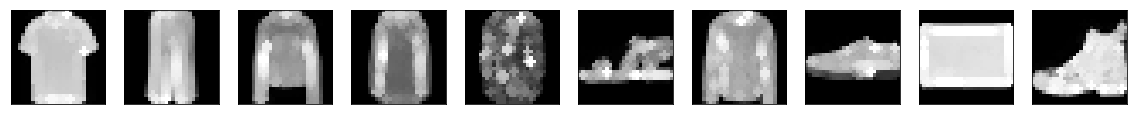

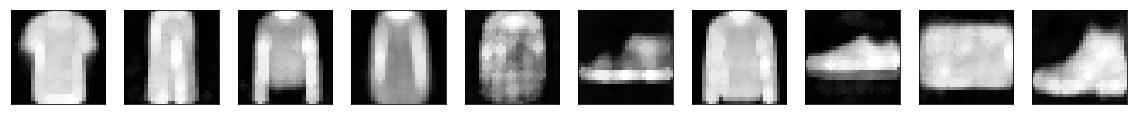

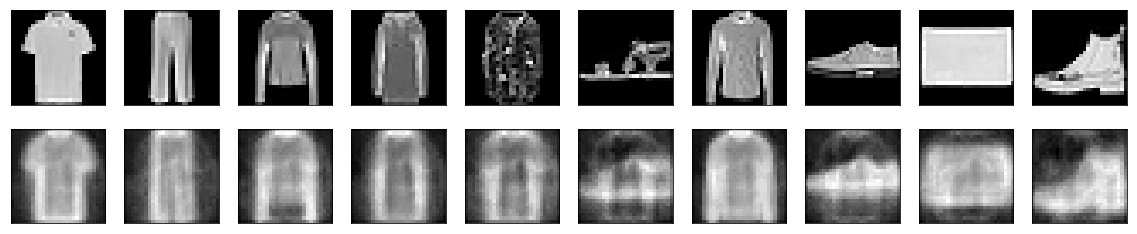

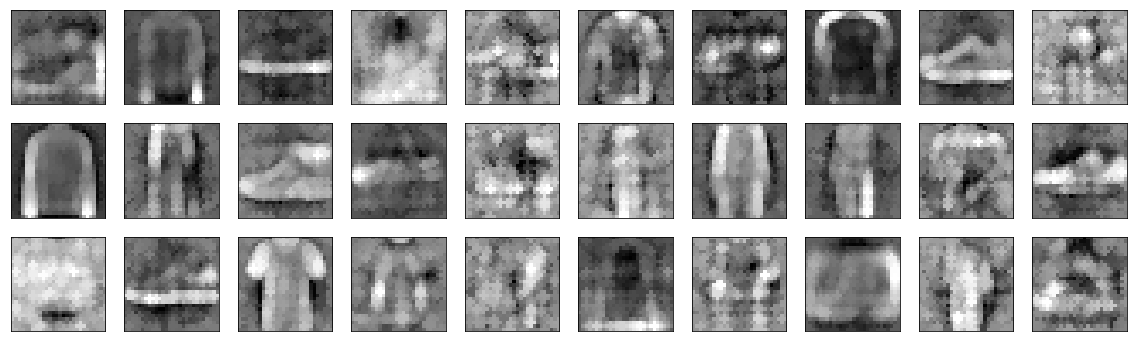

In [33]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.2 Sparsity weight = 0.1

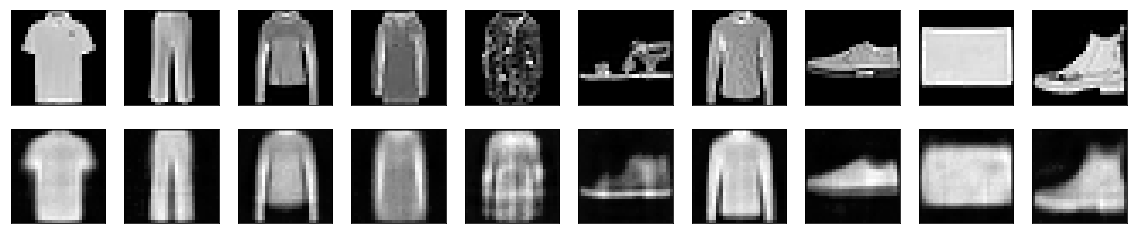

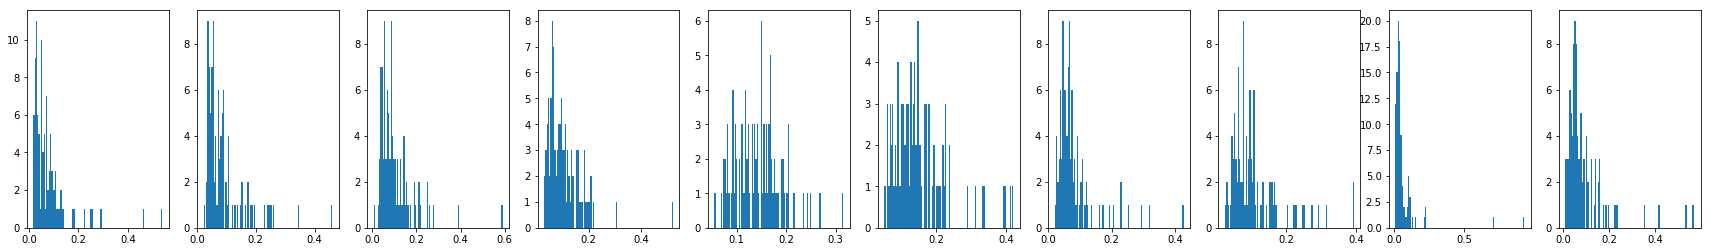

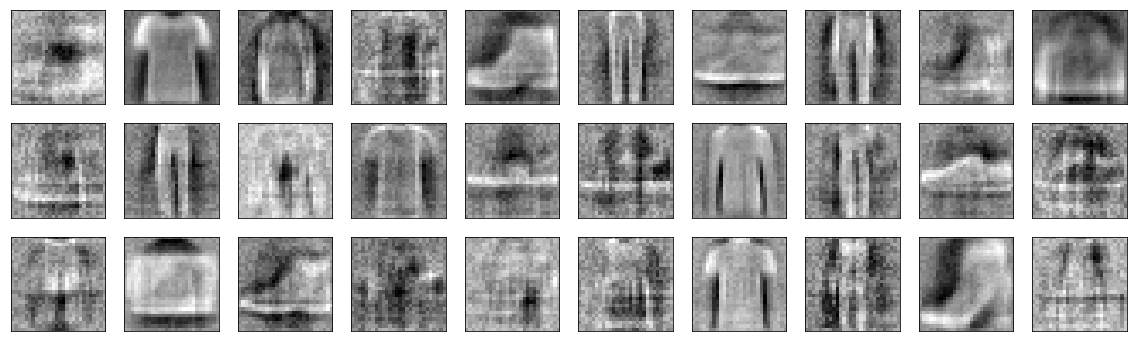

In [34]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.1_0.1.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

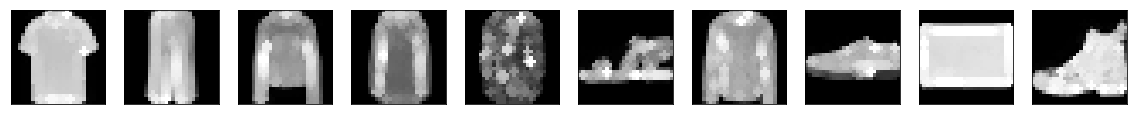

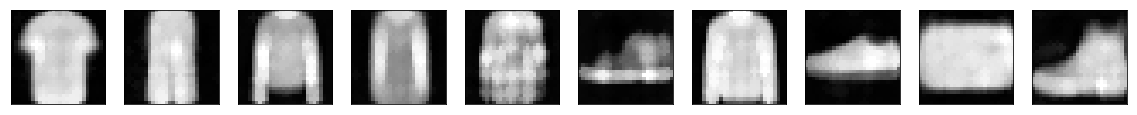

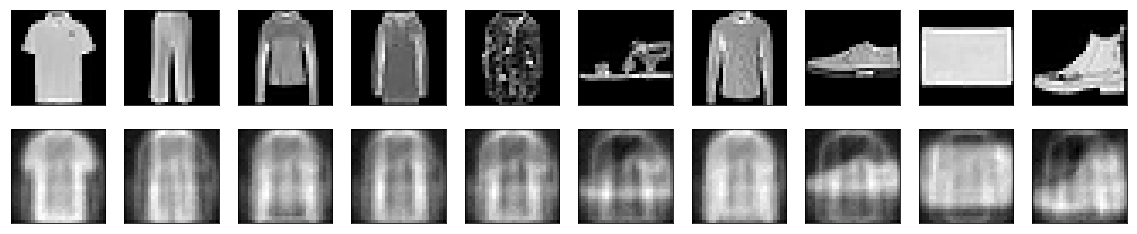

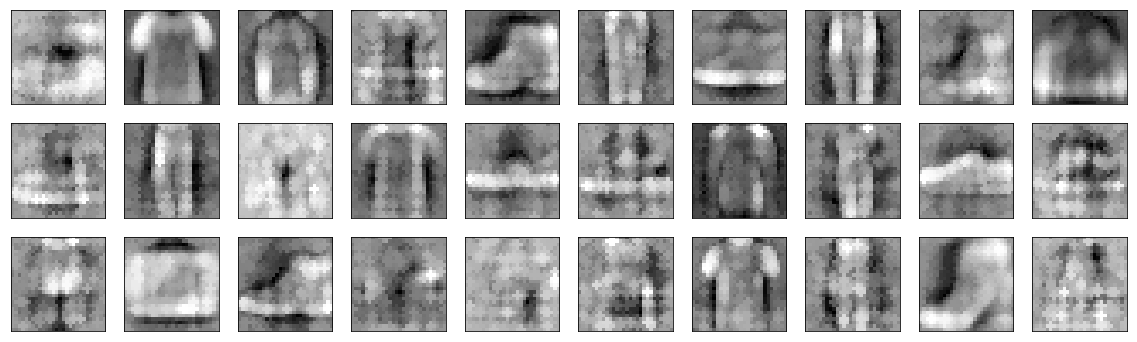

In [35]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.3 Sparsity weight = 0.5

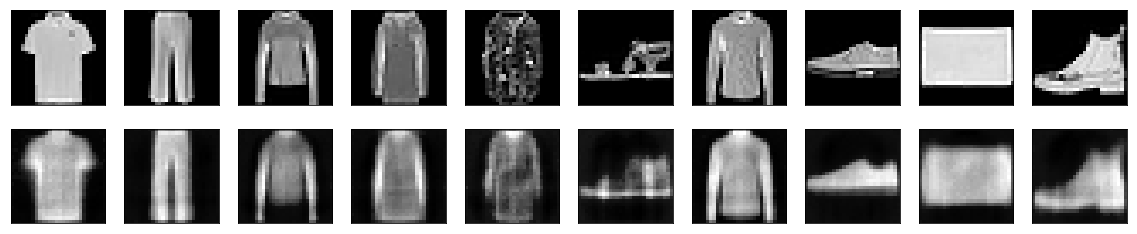

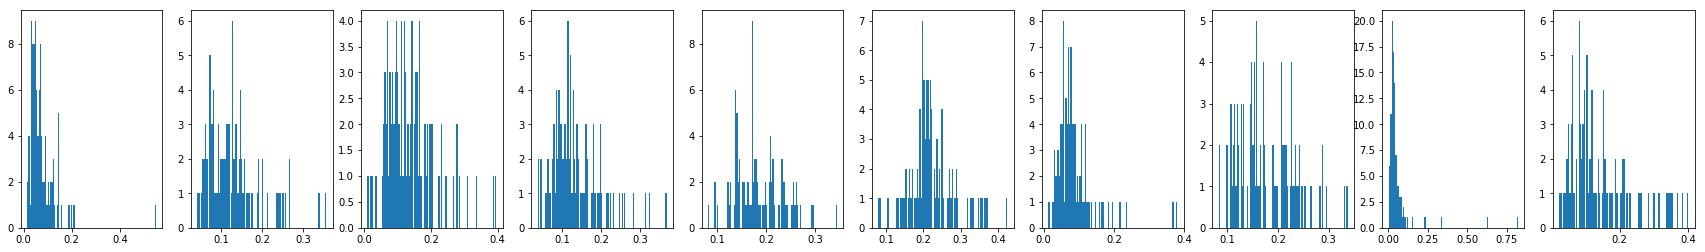

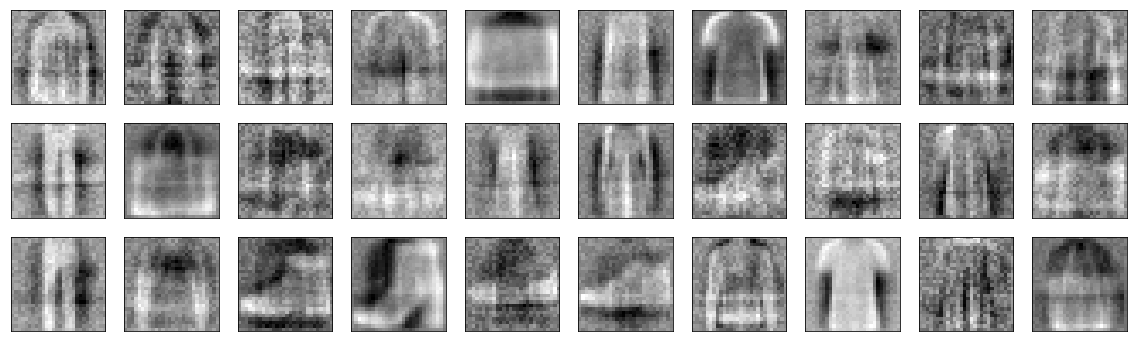

In [36]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.5_0.1.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

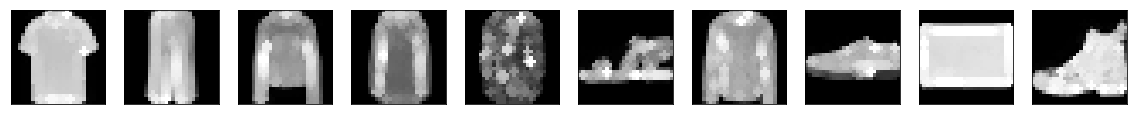

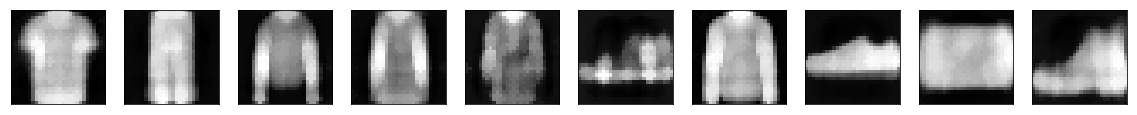

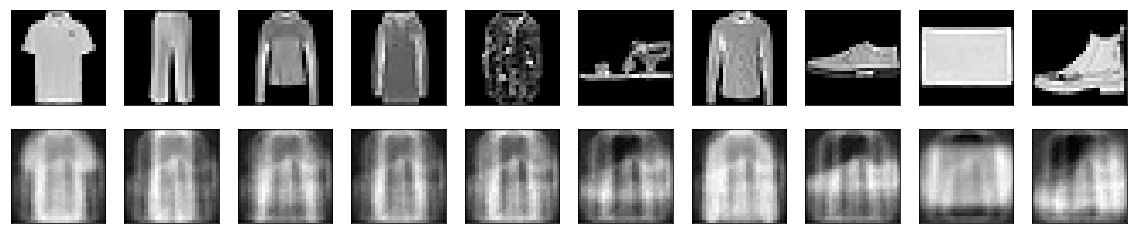

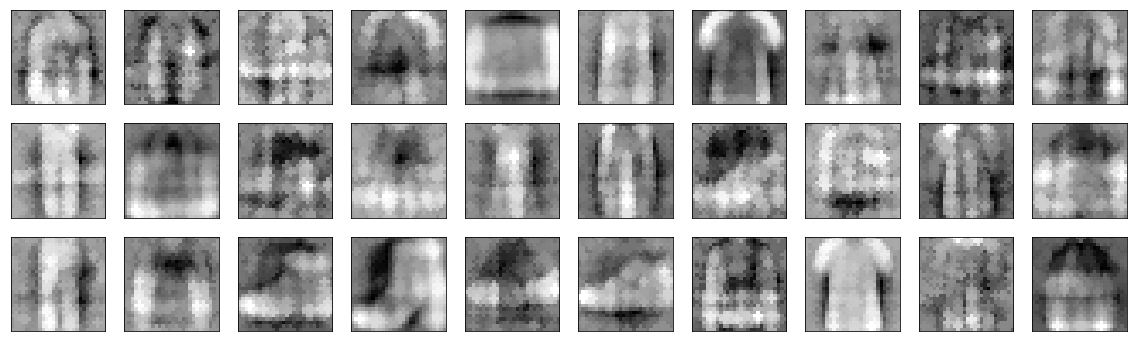

In [37]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.4 Sparsity weight = 1

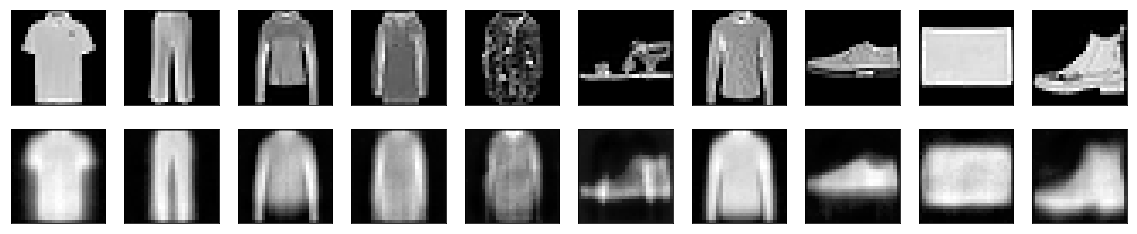

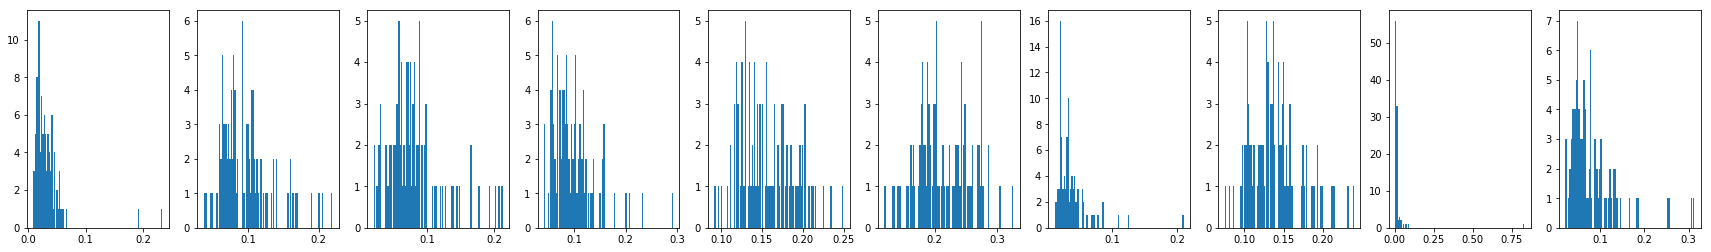

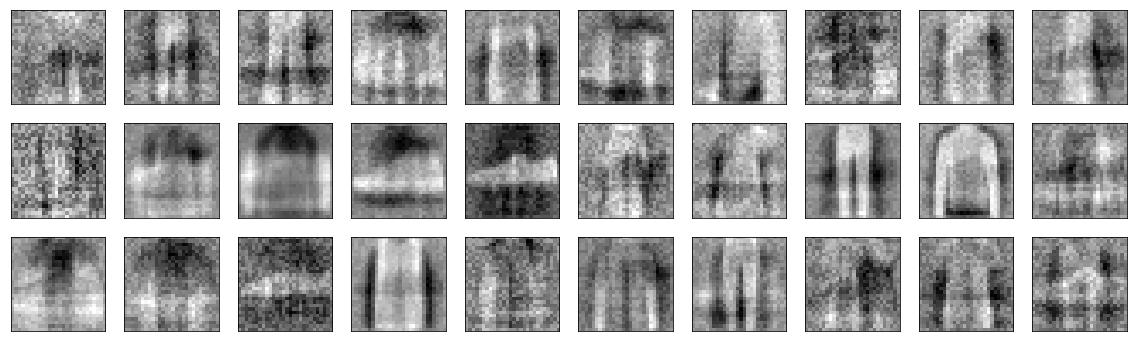

In [38]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_1_0.1.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

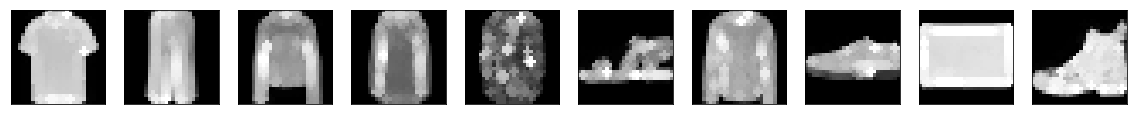

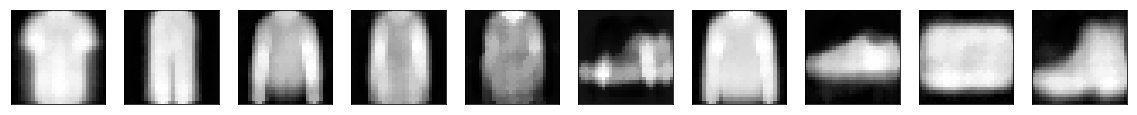

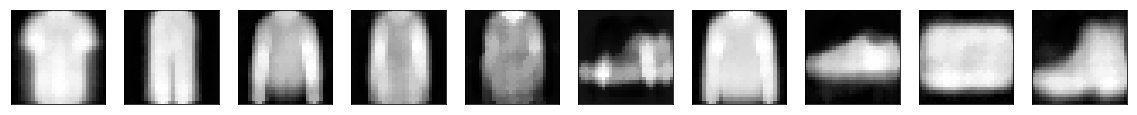

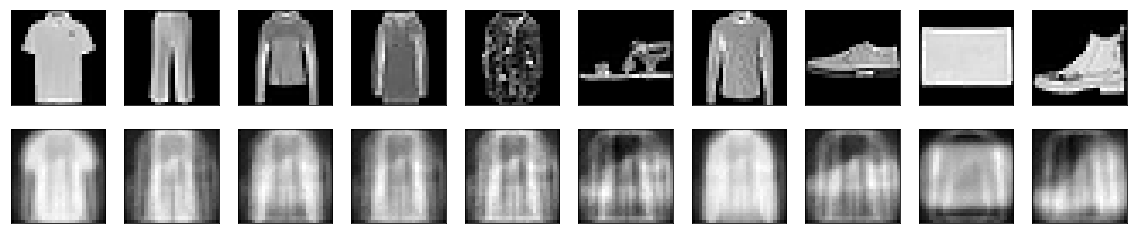

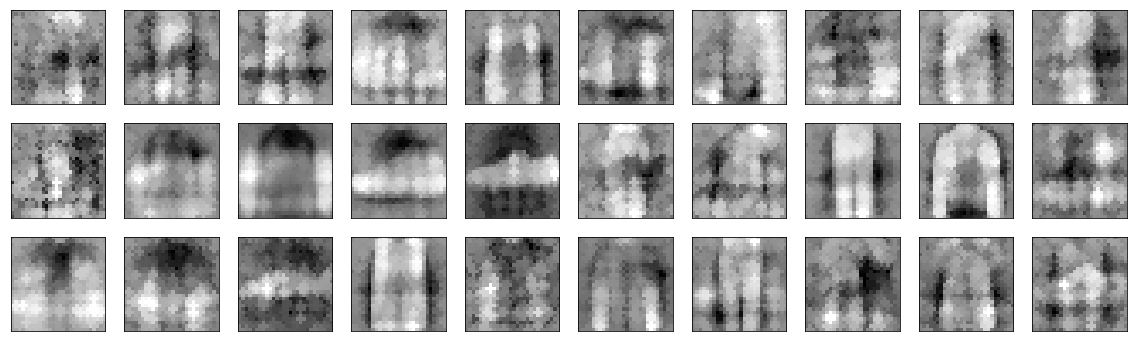

In [39]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.5 Sparsity weight = 10

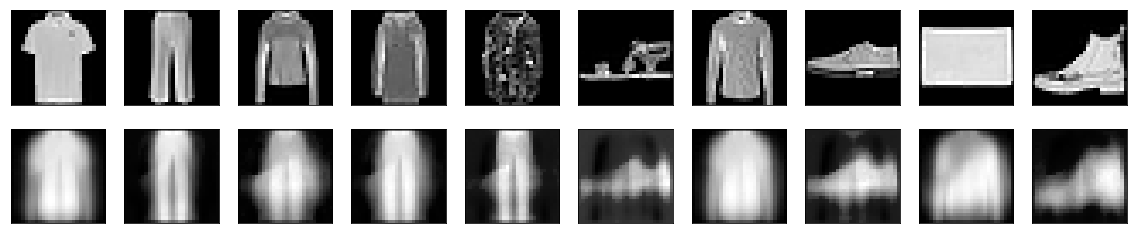

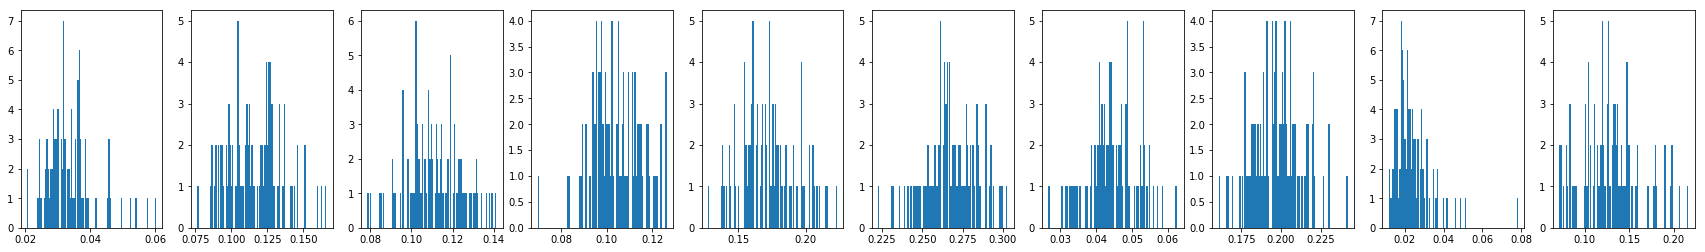

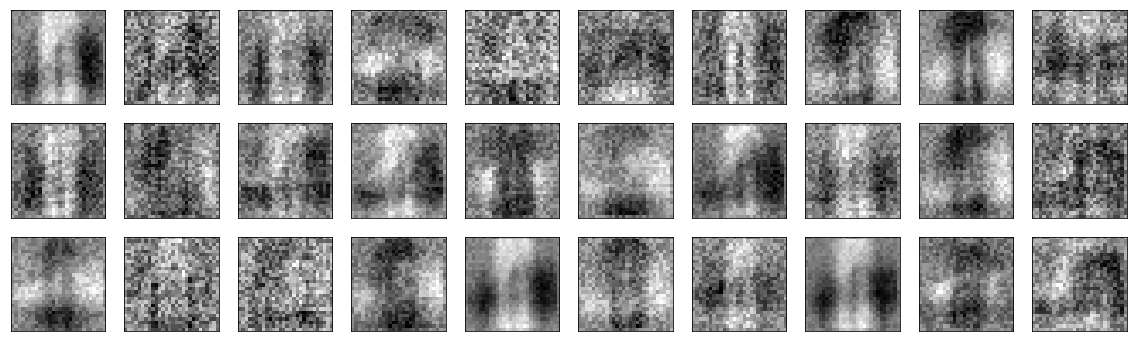

In [40]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_10_0.1.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

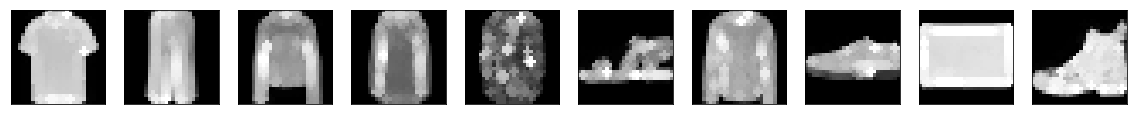

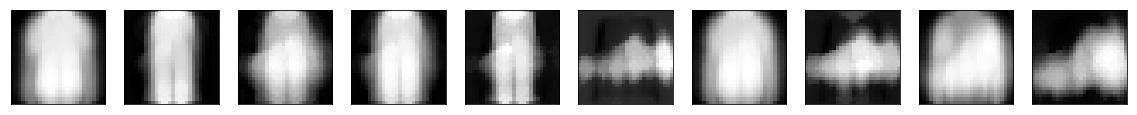

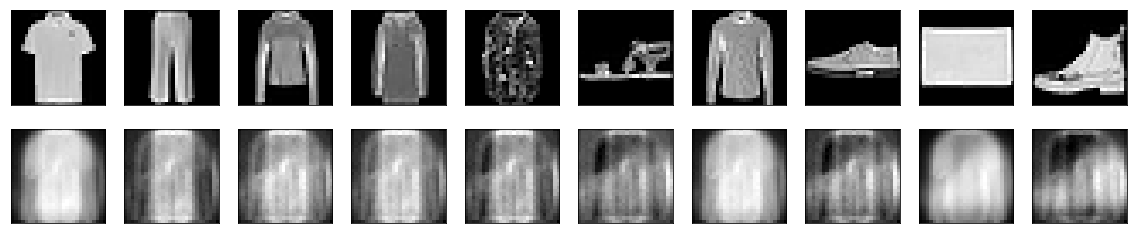

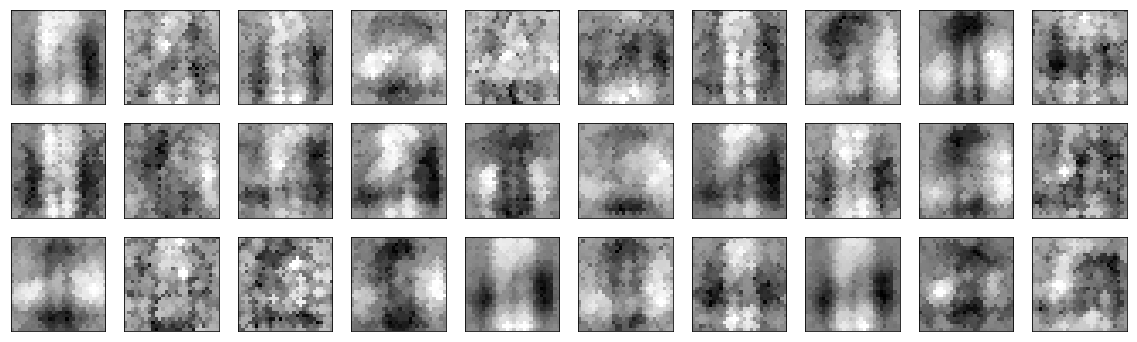

In [41]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 4. Sparsity_objective = 0.2

In [42]:
sparsity_objectives[3]

0.2

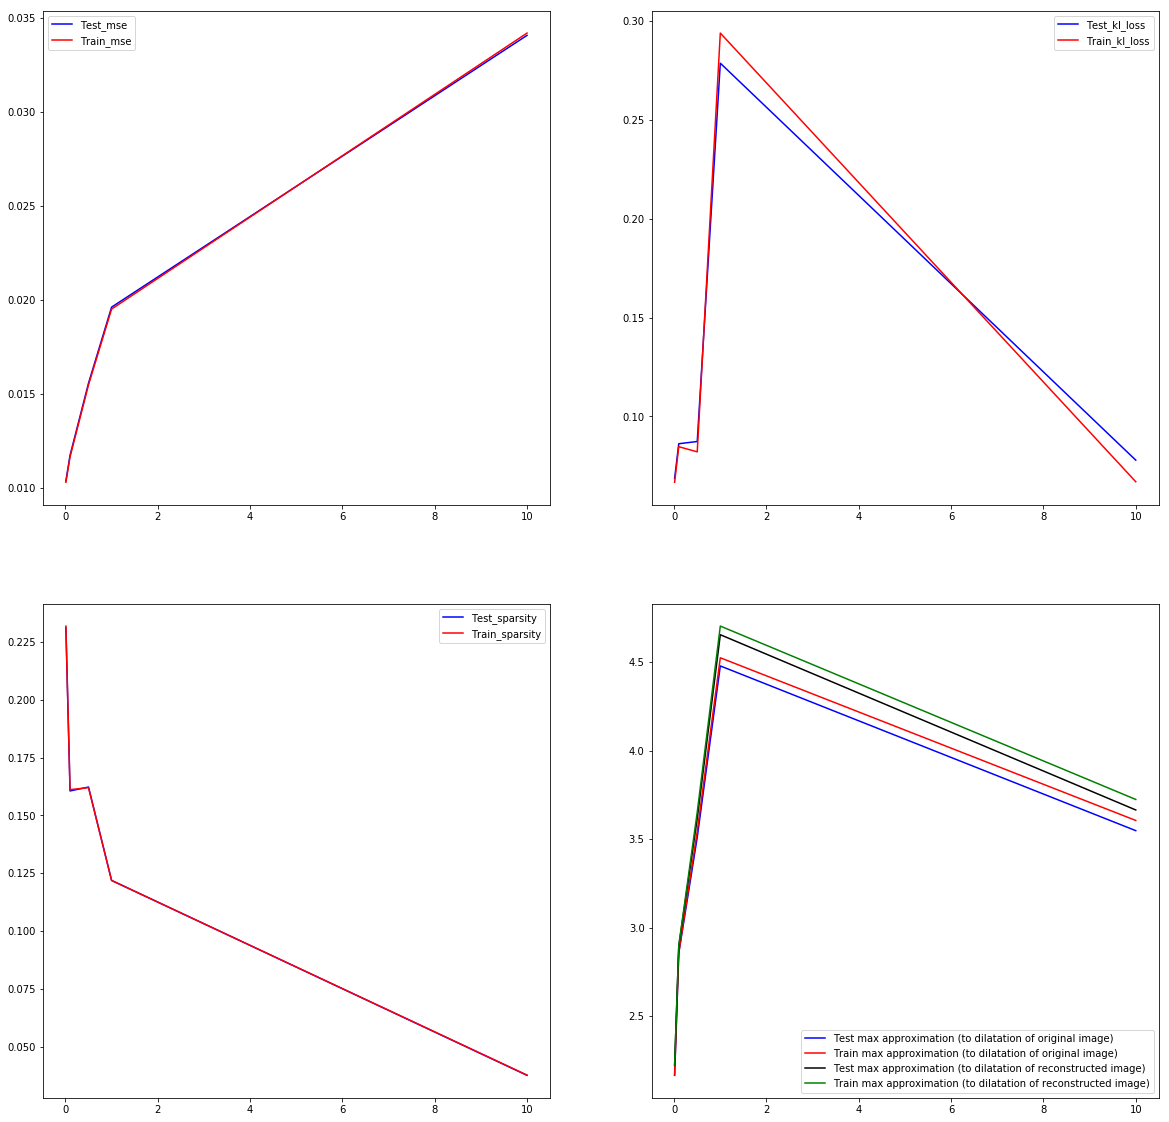

In [43]:
plt.figure(figsize=(20,20))

ax = plt.subplot(2, 2, 1)
ax.plot(sparsity_weights, test_mse[:,3], 'b')
ax.plot(sparsity_weights, train_mse[:,3], 'r')
ax.legend(['Test_mse', 'Train_mse'])

ax = plt.subplot(2, 2, 2)
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'r')
ax.legend(['Test_kl_loss', 'Train_kl_loss'])

ax = plt.subplot(2, 2, 3)
ax.plot(sparsity_weights, test_sparsity[:,3], 'b')
ax.plot(sparsity_weights, train_sparsity[:,3], 'r')
ax.legend(['Test_sparsity', 'Train_sparsity'])

ax = plt.subplot(2, 2, 4)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'g')
ax.legend(['Test max approximation (to dilatation of original image)', 
           'Train max approximation (to dilatation of original image)',
           'Test max approximation (to dilatation of reconstructed image)',
           'Train max approximation (to dilatation of reconstructed image)'])

plt.show()

## 4.1 Sparsity weight = 0.01

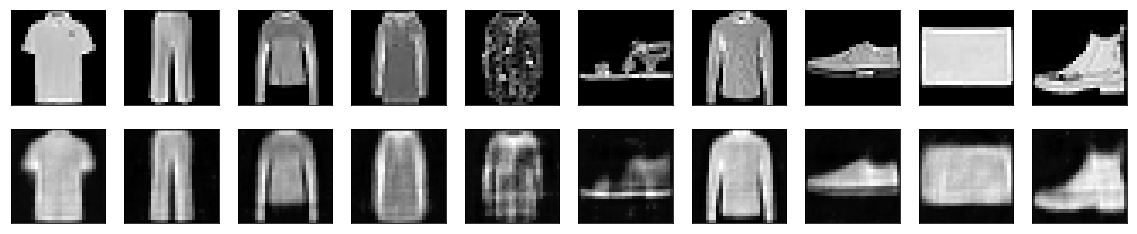

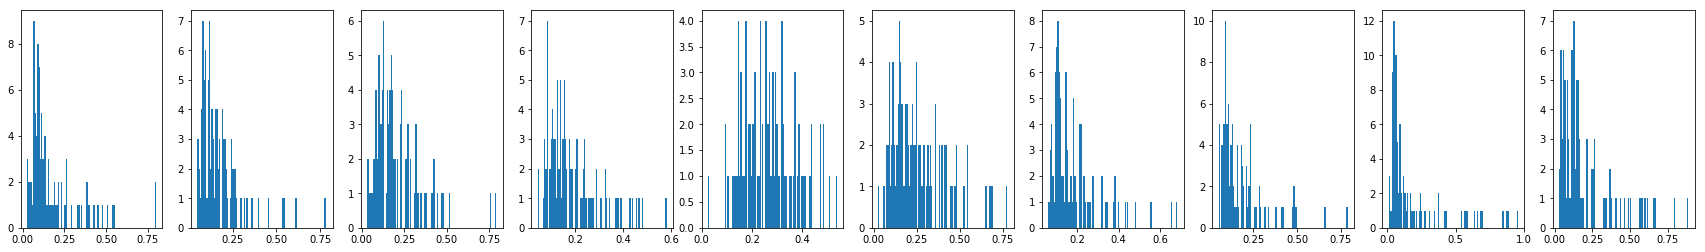

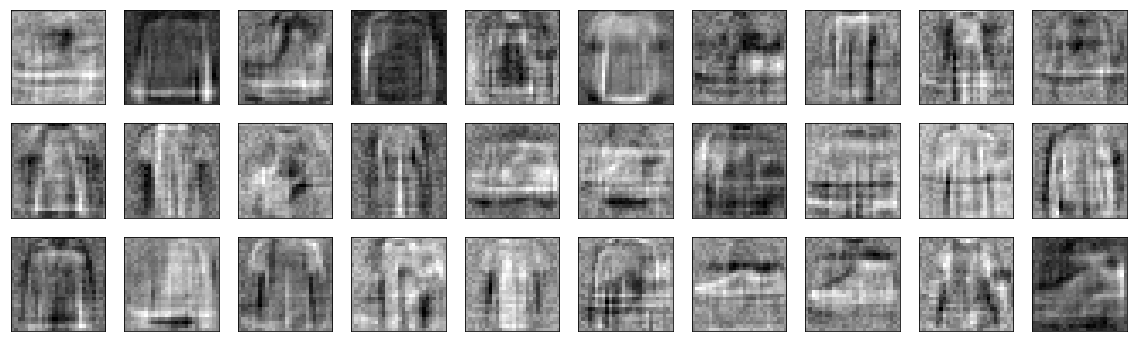

In [44]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.01_0.2.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

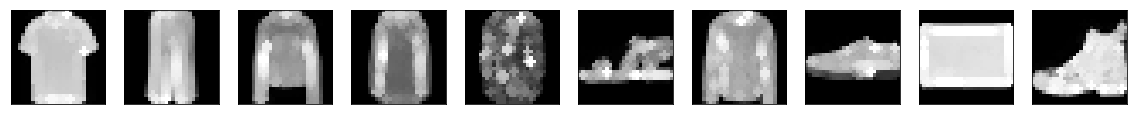

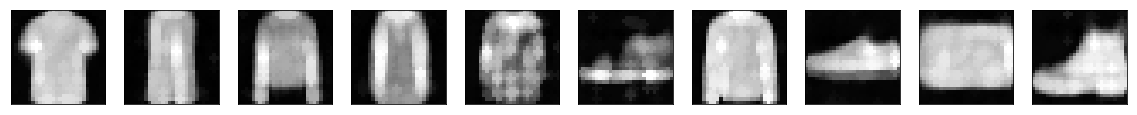

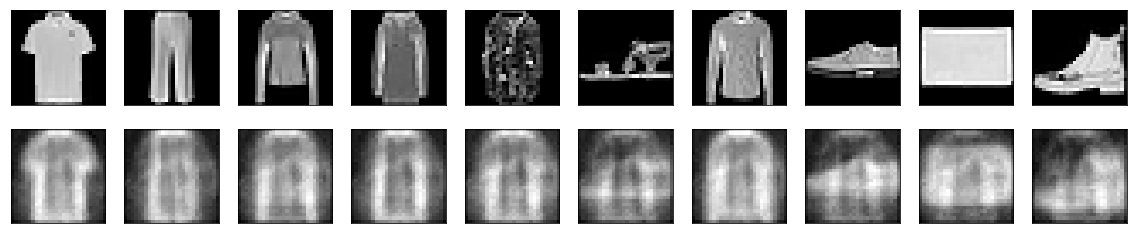

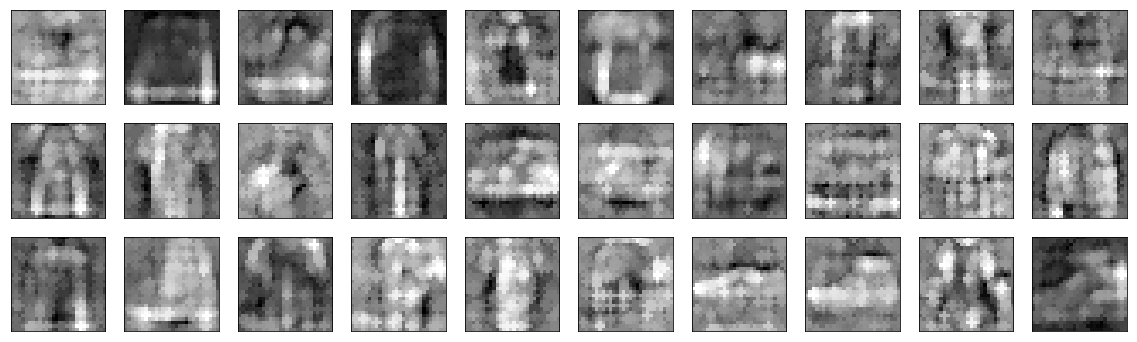

In [45]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.2 Sparsity weight = 0.1

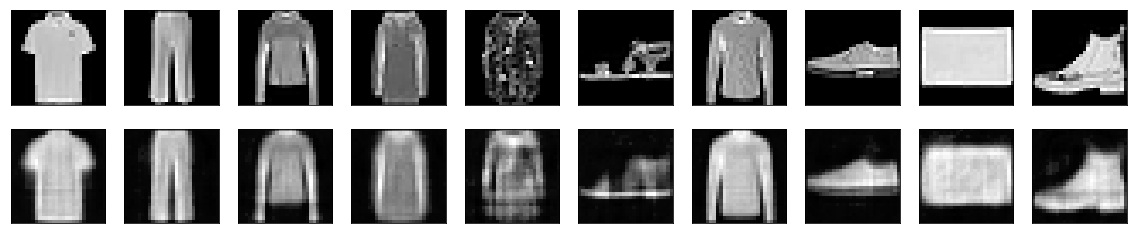

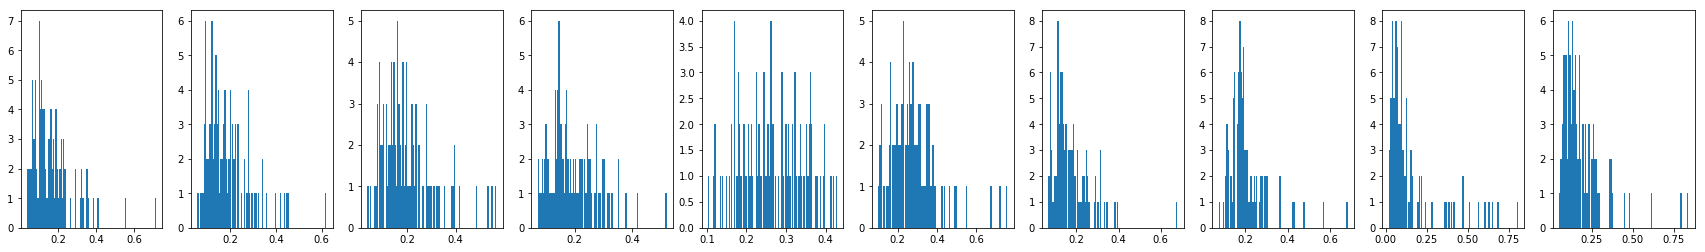

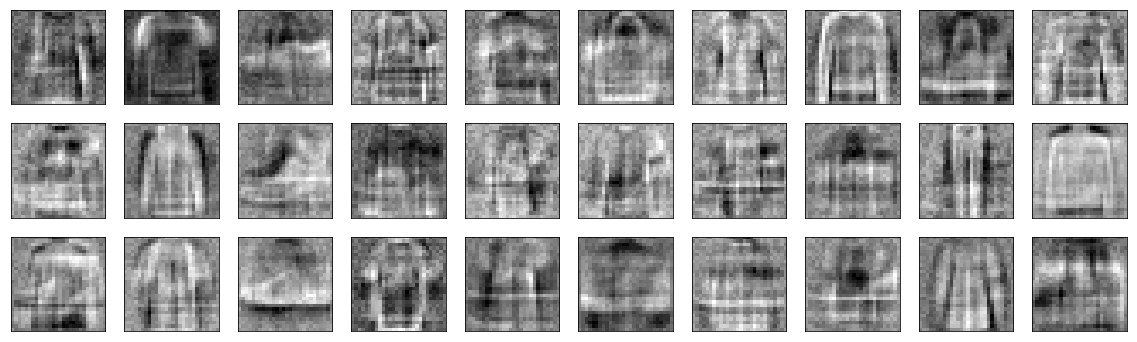

In [46]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.1_0.2.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

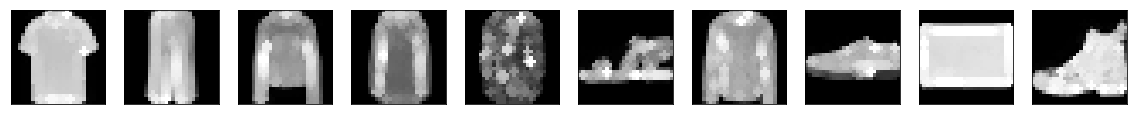

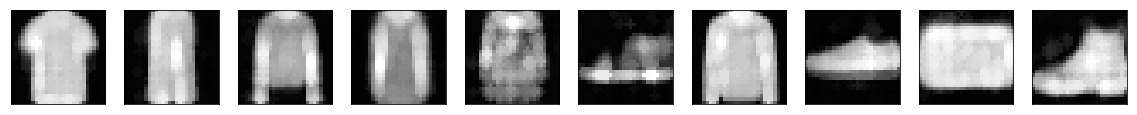

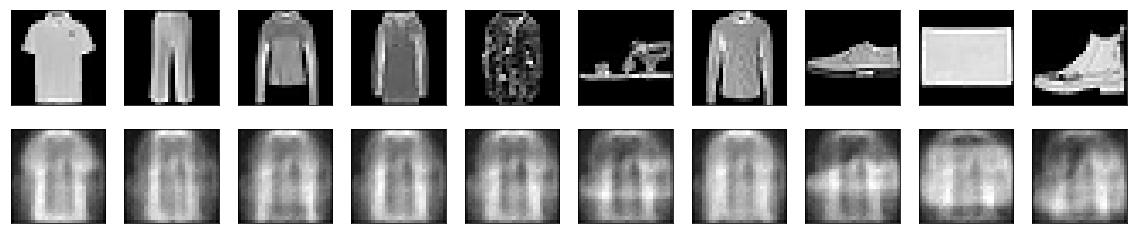

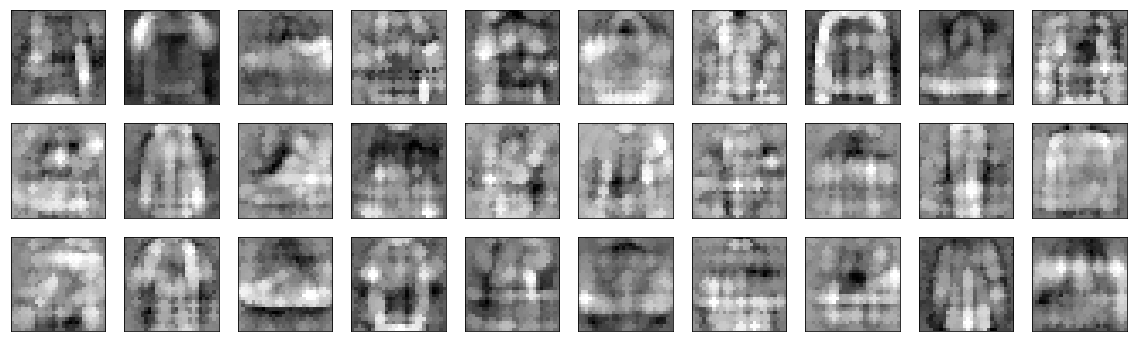

In [47]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.3 Sparsity weight = 0.5

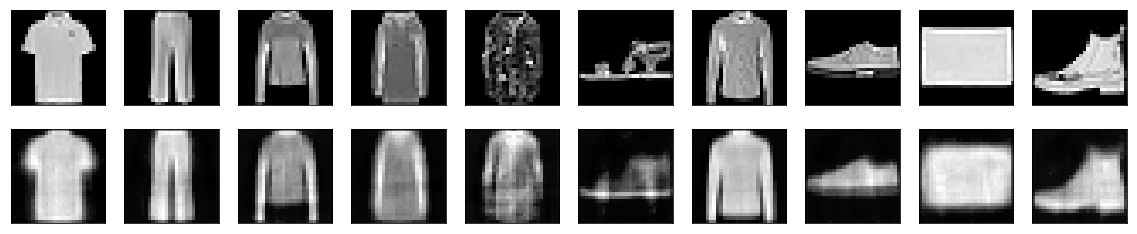

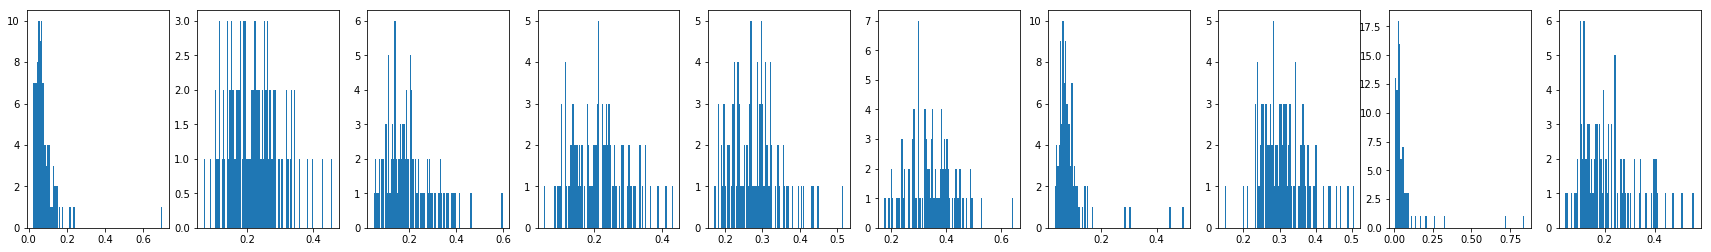

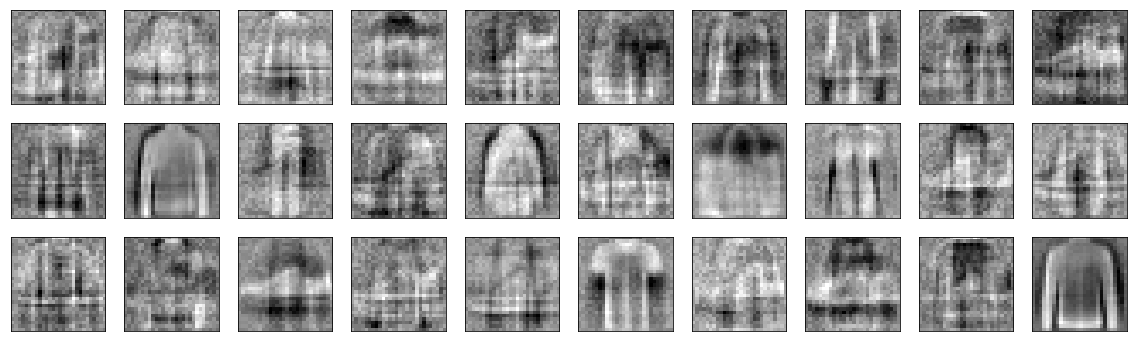

In [48]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_0.5_0.2.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

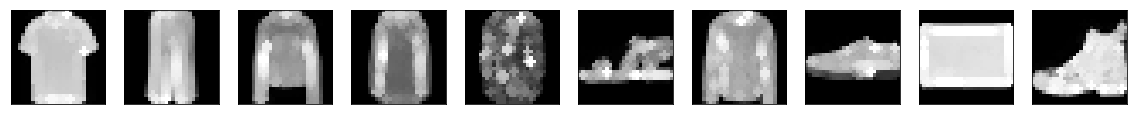

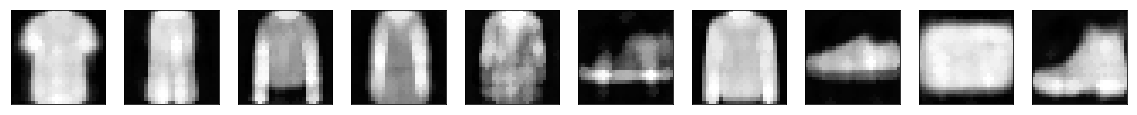

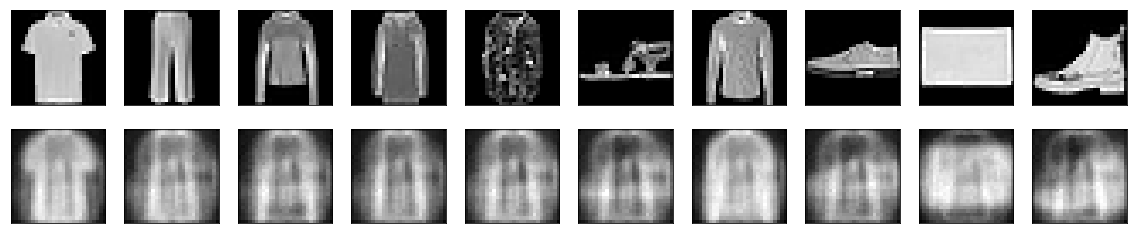

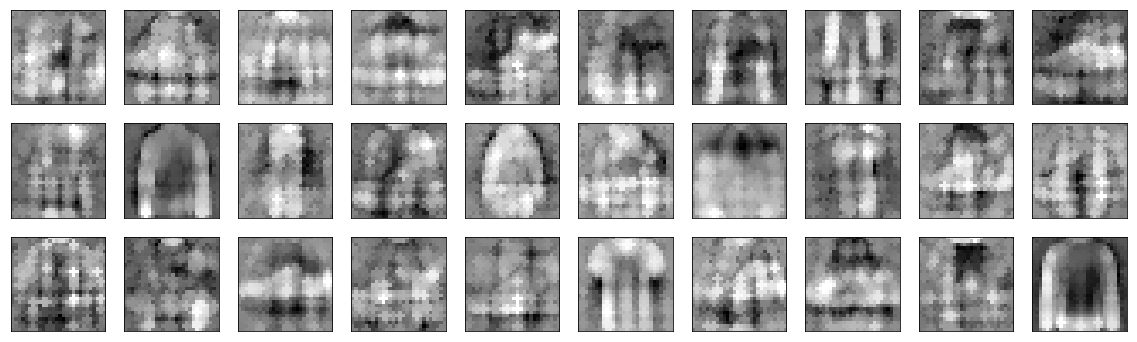

In [49]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.4 Sparsity weight = 1

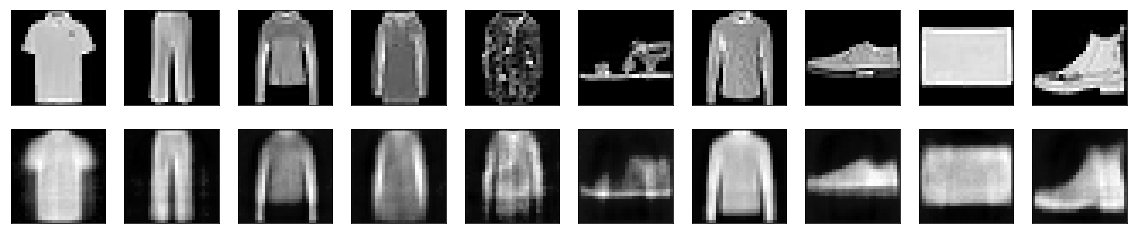

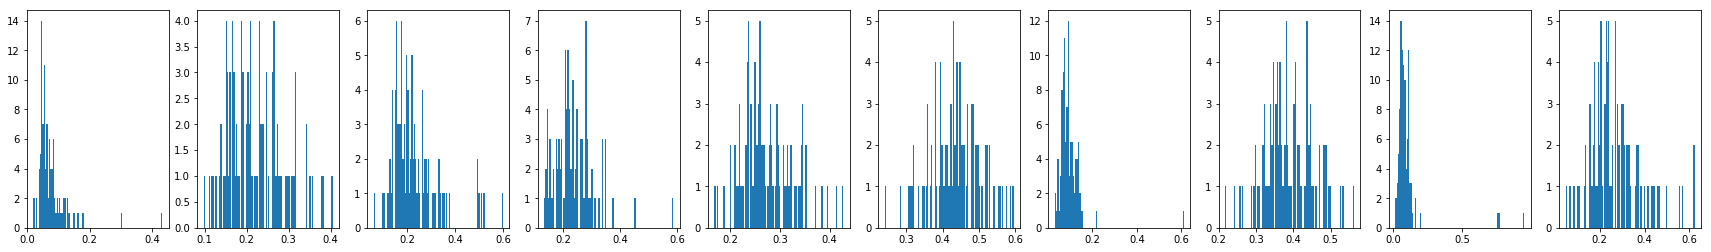

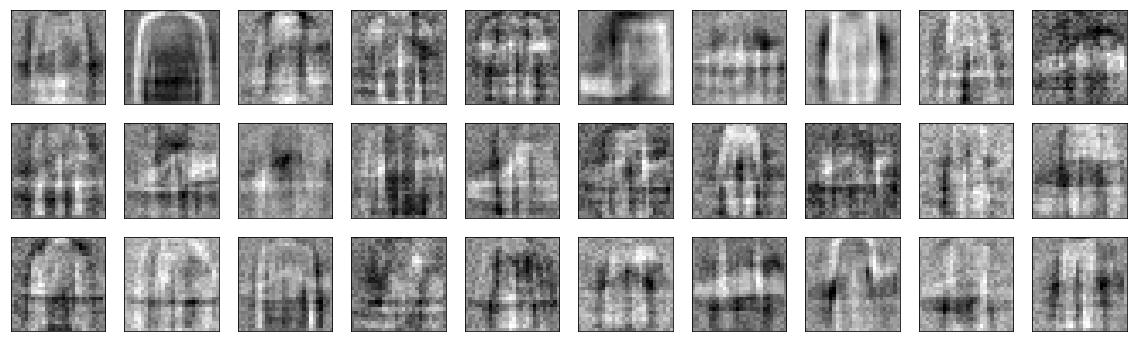

In [50]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_1_0.2.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

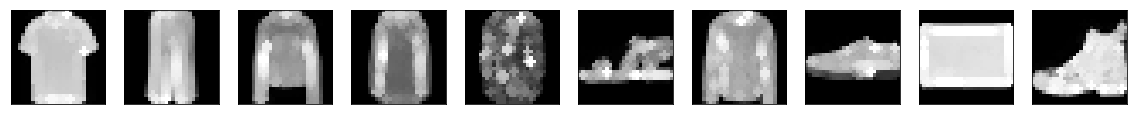

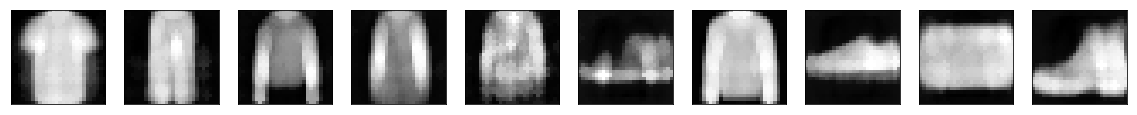

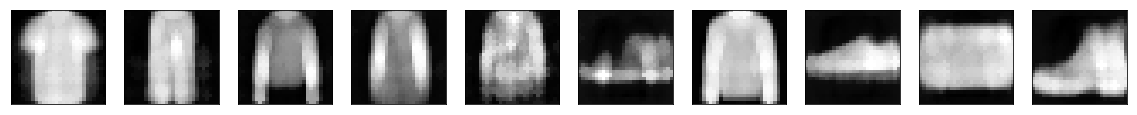

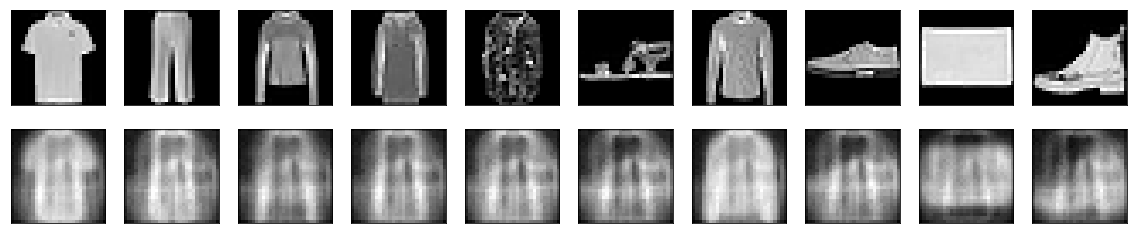

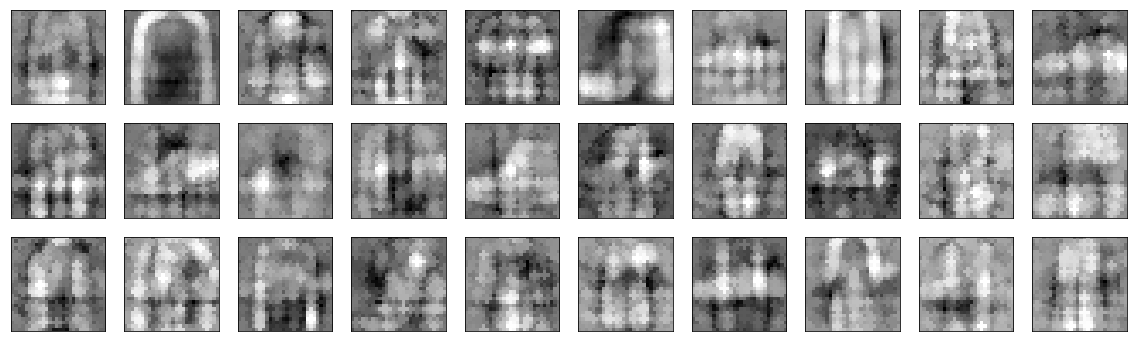

In [51]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.5 Sparsity weight = 10

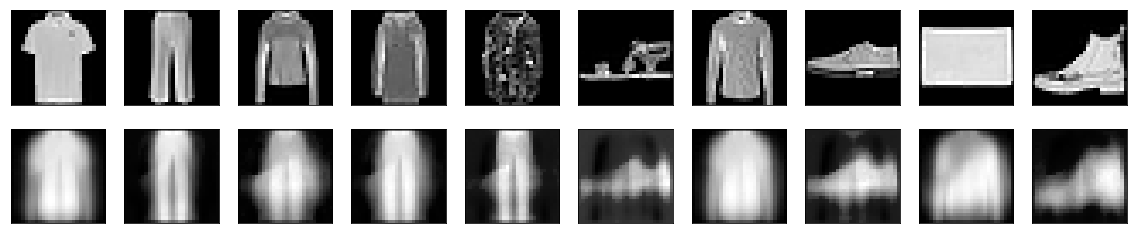

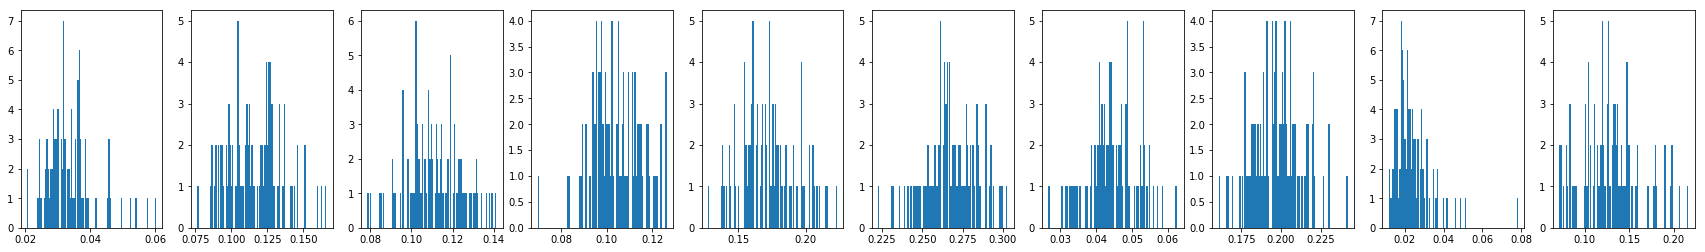

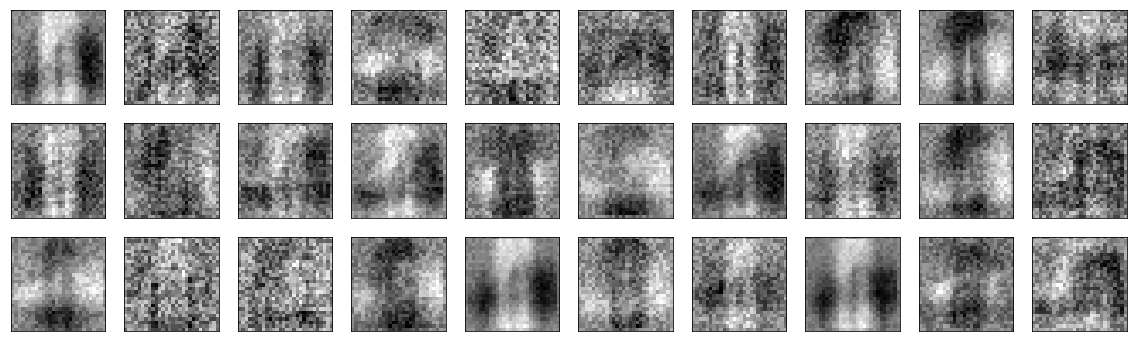

In [52]:
AE = SparseShallowAE_KL_sum.load('18_08_01_dim100_KLdivSum_10_0.1.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

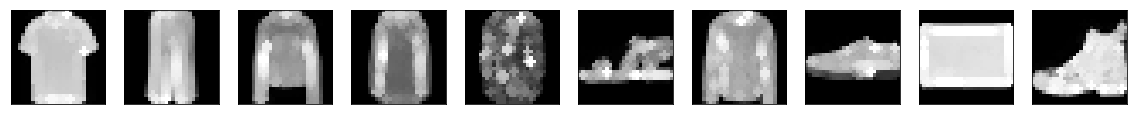

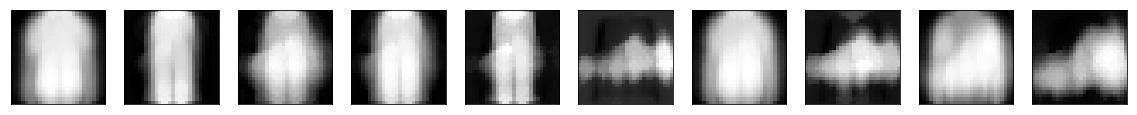

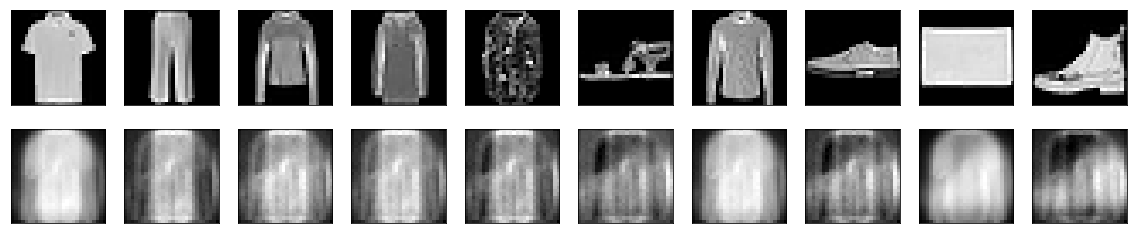

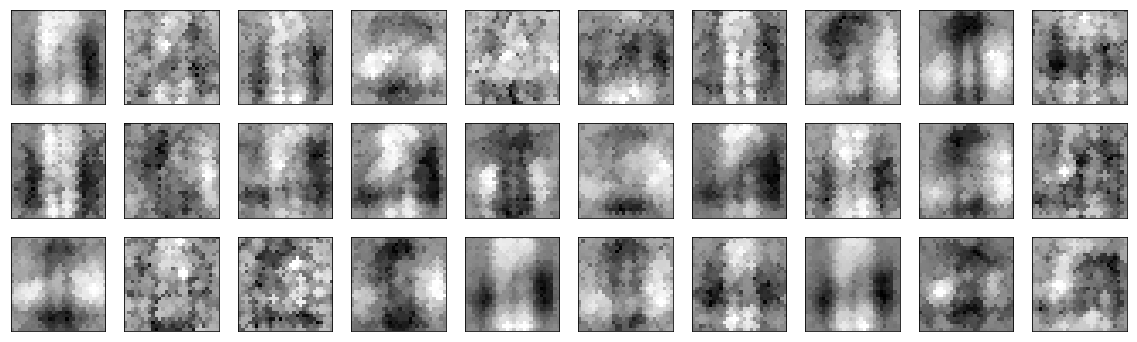

In [53]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

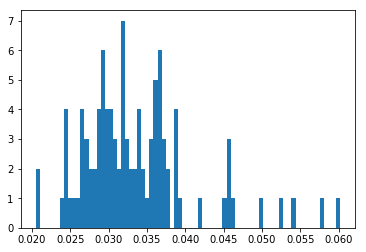

In [54]:
plt.hist(AE.encode(x_small)[0], bins=75)
plt.show()

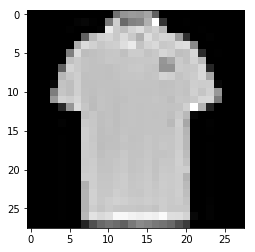

In [55]:
plt.imshow(x_small[0,:,:,0])

In [56]:
H=AE.encode(x_small)[0]

In [57]:
np.argmax(H)

77

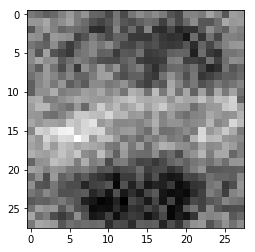

In [58]:
plt.imshow(AE.atom_images_decoder()[46,:,:,0])

In [59]:
np.sum(H>0.1)

0

In [60]:
H_new = H*(H>0.1)

In [61]:
AE.decode(H)

ValueError: Error when checking input: expected input_110 to have shape (100,) but got array with shape (1,)

In [ ]:
H=AE.encode(x_small)

In [ ]:
H_new = H*(H>0.1)

In [ ]:
bastien_utils.plot_all_images(AE.decode(H_new))

In [ ]:
AE.plot_reconstructions(x_small)